### **Mục lục**
  **1. Giới thiệu chung về bộ dữ liệu**.

    + Phương pháp thu thập.
    + Cấu trúc bộ dữ liệu MIMIC-IV.
    + Quy tắc ẩn danh dữ liệu được áp dụng.

  **2. Chi tiết về bộ dữ liệu**:

    + Gồm có các nhóm bảng nào? (Vai trò của mỗi nhóm)
    + Mỗi nhóm gồm có những bảng nào? (Vai trò của mỗi bảng)
    + Mỗi bảng có những trường dữ liệu nào? (Ý nghĩa của chúng)
    + Relationship giữa các bảng?
    + Thống kê phân phối giá trị đối với mỗi cột trong mỗi bảng.


### **1. Giới thiệu chung về bộ dữ liệu**

- Bộ dữ liệu sử dụng tên là: MIMIC IV
- Là dữ liệu thực được trích xuất từ hồ sơ sức khỏe điện tử (EHR) của Bệnh viện Beth Israel Deaconess Medical Center.

#### **1.1. Phương pháp thu thập**

**MIMIC-IV** là kết quả của sự hợp tác giữa **Beth Israel Deaconess Medical Center (BIDMC)** và **Viện Công nghệ Massachusetts (MIT)**.
Dữ liệu được thu thập tại BIDMC trong quá trình chăm sóc lâm sàng thường ngày đã được **ẩn danh**, chuyển đổi sơ bộ, và cung cấp cho các nhà nghiên cứu (những người đã hoàn thành khóa huấn luyện nghiên cứu trên người và ký thỏa thuận sử dụng dữ liệu).


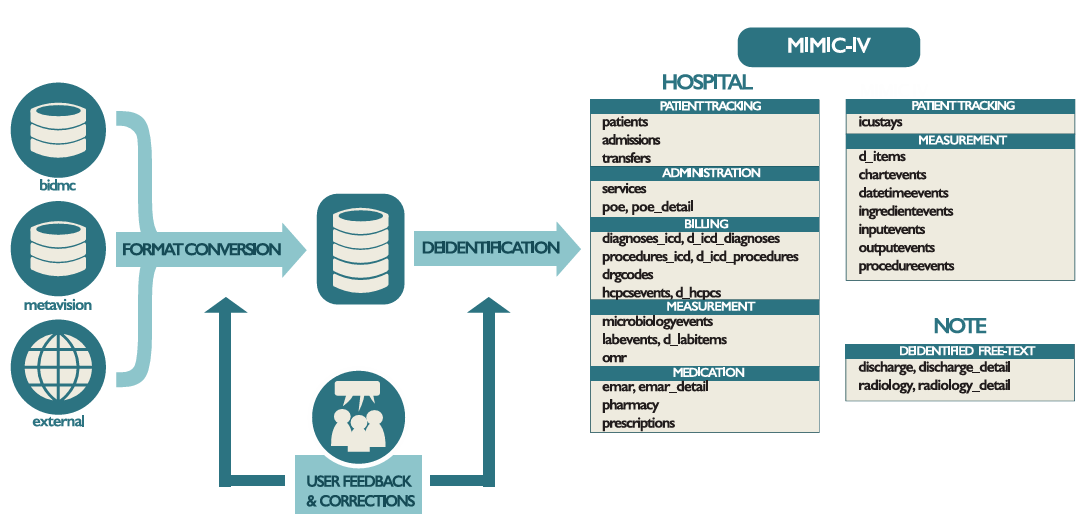

#### **1.2. Cấu trúc của bộ dữ liệu MIMIC-IV.**

- Dạng cơ sở dữ liệu quan hệ với quan hệ được định nghĩa sẵn qua bảng và cột.

- Dữ liệu chia thành 3 module chính:

  + **hosp** (toàn viện – thông tin nhập viện, xét nghiệm, hành chính, vi sinh…)

  + **icu** (tại giường bệnh ICU – truyền dịch, quan sát, thủ thuật…)

  + **note** (ghi chú văn bản tự do – tóm tắt xuất viện, báo cáo chẩn đoán hình ảnh).

- Dữ liệu được công bố dưới dạng các file .csv (đại diện cho các bảng).

#### **1.3. Quy tắc ẩn danh dữ liệu được áp dụng.**

Dữ liệu này là dữ liệu thực về y tế, có nhiều thông tin nhạy cảm, riêng tư. Nên buộc phải ẩn danh để tránh những rủi ro khi bị lộ danh tính bệnh nhân.

Theo quy định của HIPAA Safe Harbor, có 18 loại thông tin định danh cá nhân (ví dụ: tên, địa chỉ, số seri, tuổi…) phải được loại bỏ để một bộ dữ liệu được xem là đã ẩn danh. Khi đã ẩn danh, dữ liệu có thể được chia sẻ vượt ra ngoài các đơn vị y tế ban đầu.

Để đảm bảo điều này, nhóm nghiên cứu đã phát triển các thuật toán tùy chỉnh để phát hiện và loại bỏ những thông tin nhận diện cá nhân (PHI – Protected Health Information).

Cách thực hiện:
  + Bảng tra cứu (lookup tables) được dùng để gán ngẫu nhiên cho mỗi bệnh nhân một **mã định danh duy nhất (subject_id)** và cho **mỗi lần nhập viện một mã duy nhất (hadm_id)**.

  + **Ngày tháng bị thay đổi bằng cách dịch chuyển chúng theo một khoảng thời gian nhất quán ở từng bệnh nhân.** Điều này giữ cho các khoảng thời gian giữa các mốc của cùng một bệnh nhân vẫn chính xác.

  + Đối với văn bản tự do (free-text), nhóm sử dụng kết hợp hai thuật toán công bố trước đó để loại bỏ PHI.

  + Nếu một trong hai thuật toán phát hiện thông tin nhạy cảm, nó sẽ bị thay thế bằng dấu gạch dưới liên tiếp “___”.

  + Cách này áp dụng cả cho ghi chú lâm sàng trong module note lẫn các trường văn bản tự do khác trong dữ liệu có cấu trúc (ví dụ trường “ghi chú bổ sung”).

  + Sau đó, kết quả được kiểm tra thủ công bởi chuyên gia và, nếu có thể, xây dựng thêm danh sách trắng (allow list) để lọc dữ liệu trước khi phát hành.

### **2. Chi tiết về bộ dữ liệu.**

#### **2.1. Bộ dữ liệu gồm những nhóm bảng (group table) nào?**

*Trong quá trình tìm hiểu dữ liệu, tôi cũng sẽ import các file .csv vào Postgres Database, rồi dùng DBeaver để xem và thao tác dữ liệu, ngoài ra, cũng dùng DBeaver để tự động tạo ERD xem mối quan hệ cụ thể giữa các bảng (vì import toàn bộ file rất nặng, tốn thời gian, nên mõi file import 100 dòng thôi để hiểu relationship của nó là được).*

*Ngoài ra, cũng xem xét quy mô dữ liệu (mỗi bảng bao nhiều row) để tối ưu.*

##### **2.1.1. Module hosp (Bệnh viện)**
- Ghi lại dữ liệu từ toàn bộ bệnh viện Beth Israel Deaconess Medical Center.

- Bao gồm:

  + Hành chính: thông tin nhập viện, ra viện, phòng ban.

  + Dịch vụ lâm sàng: xét nghiệm (lab tests), thuốc được kê, thủ thuật y tế.

  + Hóa đơn & thanh toán: chẩn đoán (diagnoses), thủ thuật (procedures), bảo hiểm.

###### **2.1.1.1. Theo dõi bệnh nhân (Patient tracking)**

- **Bảng `patients`** - Thông tin nhân khẩu học của bệnh nhân.

| Trường             | Loại dữ liệu    | Ý nghĩa                                                  | Mô tả                                                                                     |
|--------------------|-----------------|----------------------------------------------------------|-------------------------------------------------------------------------------------------|
| subject_id  (PK)       | INTEGER NOT NULL       | Mã định danh duy nhất cho bệnh nhân                      | Khóa chính dùng để liên kết với các bảng khác như admissions, diagnoses_icd, hoặc labevents. |
| gender             | VARCHAR(1) NOT NULL          | Giới tính của bệnh nhân                                  | F: Nữ; M: Nam.                                                                           |
| anchor_age         | INTEGER NOT NULL       | Tuổi neo (anchor age) của bệnh nhân                      | Tuổi gần đúng của bệnh nhân tại thời điểm anchor_year, để bảo vệ thông tin cá nhân.       |
| anchor_year        | INTEGER NOT NULL      | Năm neo (anchor year)                                    | Năm tham chiếu được điều chỉnh để bảo vệ thông tin cá nhân, không phải năm thực tế.       |
| anchor_year_group  | VARCHAR(255) NOT NULL          | Nhóm năm neo                                             | Khoảng năm (ví dụ: 2008 - 2010) để xác định khoảng thời gian dữ liệu của bệnh nhân.       |
| dod                | TIMESTAMP(0)           | Ngày tử vong (nếu có)                                    | Ngày bệnh nhân tử vong, có thể để trống (NULL) nếu bệnh nhân còn sống hoặc không ghi nhận. |

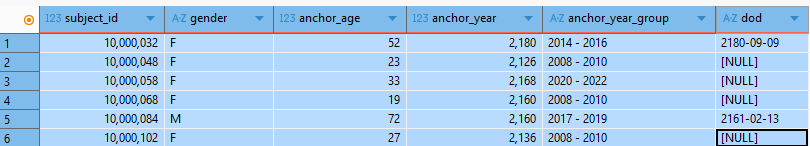

Vì bộ dữ liệu đã được dịch chuyển thời gian để bảo mật thông tin nên không thể phân tích timeline.

🔑 **Tức là:**

- Nếu muốn làm báo cáo quản trị bệnh viện (tháng này, quý này, năm này) → MIMIC-IV không phù hợp.

- Nếu muốn làm phân tích nghiên cứu y sinh (pattern trong điều trị, outcome theo độ tuổi, mô hình dự đoán) → MIMIC-IV rất phù hợp.

**=> Do đó, khi thiết kế DWH sau này, các bảng dim/fact/mart sẽ phải cân nhắc kỹ hơn vì không có dim_time/dim_date như mô hình Kimball/Imnon truyền thống.**

- **Bảng `admissions`** - Cung cấp thông tin liên quan đến việc nhập viện của bệnh nhân.

| Trường               | Loại dữ liệu    | Ý nghĩa                                                                    | Mô tả                                                                                       |
|----------------------|-----------------|----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| subject_id  (FK)         | INTEGER NOT NULL       | Mã định danh duy nhất cho bệnh nhân                                        | Khóa ngoại để liên kết với bảng patients để lấy thông tin nhân khẩu học.                    |
| hadm_id    (PK)          | INTEGER NOT NULL       | Mã định danh duy nhất cho lần nhập viện                                    | Mỗi lần nhập viện của bệnh nhân được gán một hadm_id riêng.                                 |
| admittime            | TIMESTAMP NOT NULL       | Thời gian nhập viện                                                       | Ghi lại thời điểm chính xác (ngày và giờ) khi bệnh nhân được nhận vào bệnh viện.           |
| dischtime            | TIMESTAMP       | Thời gian xuất viện                                                       | Thời điểm bệnh nhân rời bệnh viện (về nhà, chuyển viện, hoặc tử vong).                     |
| deathtime            | TIMESTAMP       | Thời gian tử vong (nếu có)                                                | Chỉ điền nếu bệnh nhân tử vong trong bệnh viện, để trống (NULL) nếu không tử vong.         |
| admission_type       | VARCHAR(40) NOT NULL          | Loại hình nhập viện                                                       | Rất hữu ích để phân loại mức độ khẩn cấp của việc nhập viện.           |
| admit_provider_id    | VARCHAR(10)          | Mã định danh người phụ trách khi nhập viện.                                    | Liên kết với bảng provider để xác định bác sĩ/nhóm y tế phụ trách nhập viện.                |
| admission_location   | VARCHAR(60)          | Nơi bệnh nhân được chuyển đến khi nhập viện                                | Ví dụ: Emergency Room, Physician Referral, Transfer from Hospital, Clinic Referral.         |
| discharge_location   | VARCHAR(60)          | Nơi bệnh nhân được chuyển đến sau xuất viện                                | Ví dụ: Home, Skilled Nursing Facility, Rehab, Deceased, Another Hospital.                   |
| insurance            | VARCHAR(255)          | Loại bảo hiểm y tế của bệnh nhân                                           | Ví dụ: Medicare, Medicaid, Private, Other.                                                  |
| language             | VARCHAR(10)          | Ngôn ngữ chính của bệnh nhân                                              | Thường là ENGLISH hoặc OTHER, hỗ trợ xác định nhu cầu phiên dịch.                          |
| marital_status       | VARCHAR(30)          | Tình trạng hôn nhân của bệnh nhân                                         | Ví dụ: Married, Single, Divorced, Widowed. Có thể để trống (NULL).                         |
| race                 | VARCHAR(80)          | Chủng tộc hoặc dân tộc của bệnh nhân                                      | Ví dụ: White, Black/African American, Asian, Hispanic/Latino, Unknown.                      |
| edregtime            | TIMESTAMP       | Thời gian đăng ký tại phòng cấp cứu (nếu có)                               | Thời điểm đăng ký tại phòng cấp cứu trước khi nhập viện, để trống nếu không qua cấp cứu.    |
| edouttime            | TIMESTAMP       | Thời gian rời khỏi phòng cấp cứu (nếu có)                                 | Thời điểm rời phòng cấp cứu để chuyển vào khoa nội trú hoặc xuất viện, để trống nếu không áp dụng. |
| hospital_expire_flag | SMALLINT| Cờ báo hiệu bệnh nhân tử vong trong bệnh viện                              | 0: Không tử vong; 1: Tử vong trong bệnh viện.                                               |

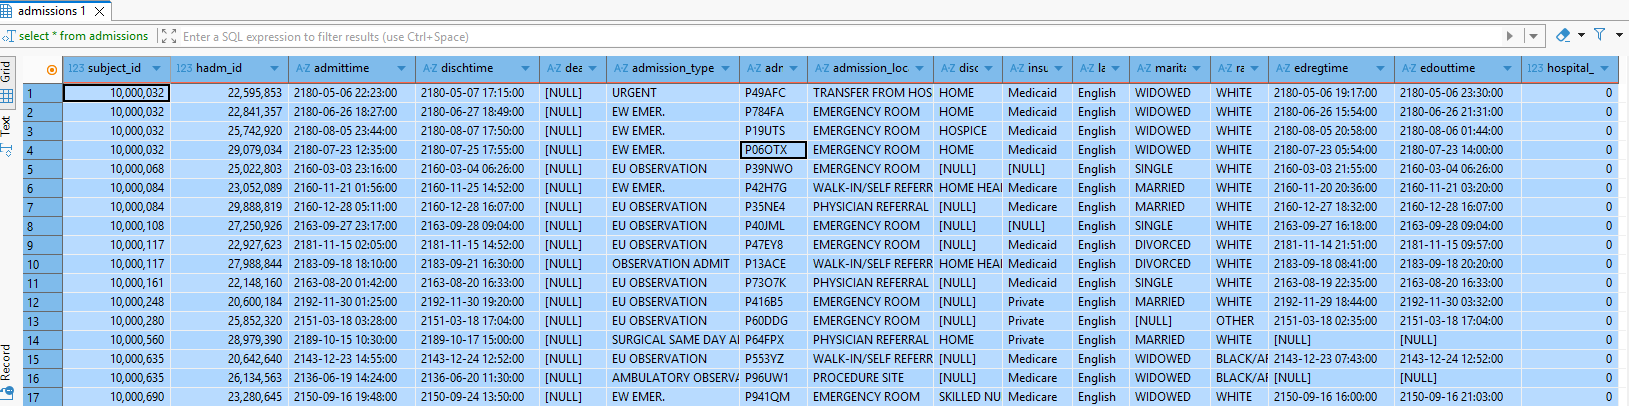

- **Bảng `transfers`** - Địa điểm thực tế cho bệnh nhân trong suốt thời gian nằm viện **(Bảng icustays có nguồn gốc từ bảng này)**.



| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| subject_id (FK) | INTEGER NOT NULL | Mã định danh duy nhất cho bệnh nhân | Khóa chính liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| hadm_id (FK)| INTEGER | Mã định danh duy nhất cho lần nhập viện | Liên kết với bảng admissions, có thể để trống nếu chuyển viện không liên quan nhập viện. |
| transfer_id (PK) | INTEGER NOT NULL | Mã định danh duy nhất cho vị trí thực tế của bệnh nhân | Mã định danh duy nhất cho vị trí thực tế của bệnh nhân. |
| eventtype | VARCHAR(10) | Loại sự kiện chuyển viện | Ví dụ: admit (nhập viện), transfer (chuyển khoa), discharge (xuất viện), ED (cấp cứu). |
| careunit | VARCHAR(255) | Loại đơn vị hoặc khu vực mà bệnh nhân đang ở | Ví dụ về các đơn vị chăm sóc bao gồm: medical ICUs, surgical ICUs, medical wards, new baby nurseries,... |
| intime | TIMESTAMP(0) | Thời gian bắt đầu sự kiện chuyển viện | intime cung cấp ngày và giờ bệnh nhân được chuyển đến đơn vị chăm sóc hiện tại (careunit) từ đơn vị chăm sóc trước đó |
| outtime | TIMESTAMP(0) | Thời gian kết thúc sự kiện chuyển viện | Outtime cung cấp ngày và giờ bệnh nhân được chuyển ra khỏi địa điểm thực tế hiện tại. |

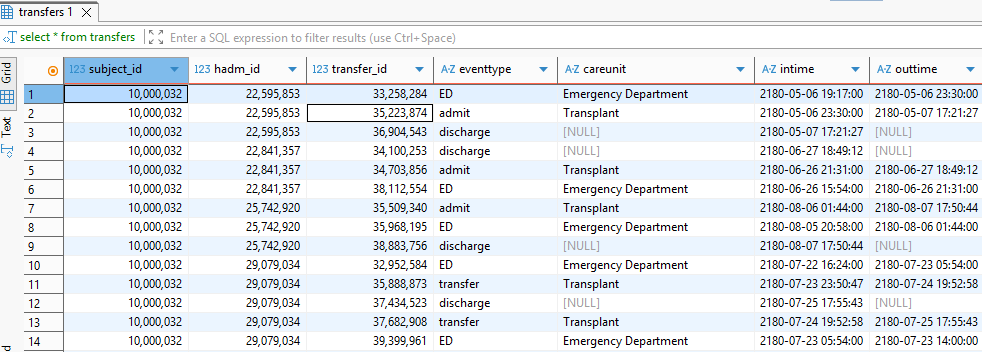

###### **2.1.1.2. Quản lý hành chính (Administration)**

- **Bảng `services`** - Mô tả loại dịch vụ (khoa/nhóm điều trị) mà bệnh nhân được tiếp nhận.

| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| subject_id (FK) | INTEGER NOT NULL | Mã định danh duy nhất cho bệnh nhân | Khóa chính liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| hadm_id (FK) (PK) | INTEGER NOT NULL | Mã định danh duy nhất cho lần nhập viện | Liên kết với bảng admissions để xác định lần nhập viện cụ thể. |
| transfertime (PK)| TIMESTAMP(0) | Thời gian chuyển đổi dịch vụ | Thời điểm bệnh nhân được chuyển sang một dịch vụ y tế mới trong quá trình nhập viện. |
| prev_service | VARCHAR(20) | Dịch vụ y tế trước đó | Dịch vụ y tế mà bệnh nhân đang được chăm sóc trước khi chuyển sang dịch vụ mới, có thể để trống nếu không có dịch vụ trước đó. |
| curr_service | VARCHAR(20) | Dịch vụ y tế hiện tại | Dịch vụ y tế mà bệnh nhân được chuyển đến, ví dụ: CMED (Cardiac Medicine), SURG (Surgery), MED (Medicine), ICU. |

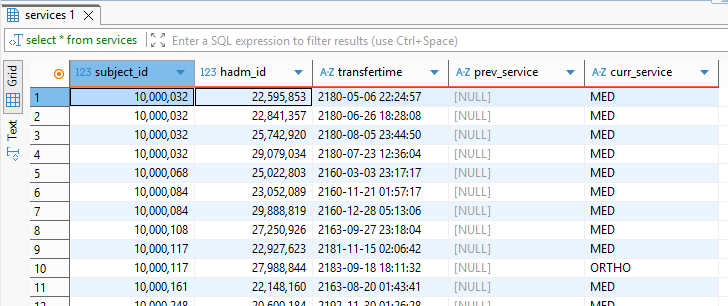

- **Bảng `poe`** - Hệ thống nhập y lệnh điện tử của bệnh viện, nơi bác sĩ/y tá ghi chỉ định thuốc, xét nghiệm, phẫu thuật… sẽ thực hiện cho bệnh nhân.

| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| poe_id (PK) | VARCHAR(25) NOT NULL | Mã định danh duy nhất cho lệnh y tế | poe_id = subject_id-poe_seq |
| poe_seq | INTEGER NOT NULL | Số thứ tự của lệnh y tế | Một số nguyên tăng dần đơn điệu, được dùng để sắp xếp các y lệnh POE theo thứ tự thời gian. |
| subject_id (FK) | INTEGER NOT NULL | Mã định danh duy nhất cho bệnh nhân | Khóa chính liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| hadm_id (FK)| INTEGER | Mã định danh duy nhất cho lần nhập viện | Liên kết với bảng admissions để xác định lần nhập viện cụ thể. |
| order_time | TIMESTAMP(0) NOT NULL | Thời gian nhập lệnh y tế | Thời điểm lệnh được nhập vào hệ thống, bao gồm ngày và giờ. |
| order_type | VARCHAR(25) NOT NULL | Loại lệnh y tế | Loại lệnh được nhập, ví dụ: Medications, Lab, Imaging, Procedure, Consult, Diet, Nursing. |
| order_subtype | VARCHAR(50) | Cung cấp chi tiết hơn về loại y lệnh mà nhân viên y tế đã nhập. Trường order_subtype được hiểu tốt nhất khi kết hợp với order_type. |  Ví dụ: order_type: 'Cardiology' (Tim mạch) đi kèm với order_subtype: 'Holter Monitor' (máy theo dõi nhịp tim Holter). |
| transaction_type | VARCHAR(15) | Khi nvyt tạo/sửa/hủy/thực hiện một y lệnh, hệ thống EHR sẽ log lại hành động đó. | New → Tạo y lệnh mới (New order). Change → Thay đổi/yêu cầu chỉnh sửa y lệnh hiện có (Change order). D/C → Discontinue = Ngưng, hủy y lệnh. Co → Có thể là Continue = tiếp tục y lệnh. H → Hold = tạm dừng y lệnh. T → Transfer = chuyển y lệnh (ví dụ chuyển sang khoa khác). |
| discontinue_of_poe_id | VARCHAR(25) | Nếu y lệnh này ngừng/thay đổi (D/C và Change) một y lệnh trước đó, thì discontinue_of_poe_id sẽ liên kết đến y lệnh trước đó đã bị ngừng/thay đổi. | discontinue_of_poe_id = trỏ về y lệnh cũ mà y lệnh hiện tại đã ngừng (D/C) hoặc đã thay đổi (Change). |
| discontinued_by_poe_id | VARCHAR(25) | Nếu y lệnh này sau đó bị một y lệnh khác ngừng lại, thì discontinued_by_poe_id sẽ liên kết đến y lệnh ngừng trong tương lai đó. | discontinued_by_poe_id = trỏ về y lệnh mới đã ngừng y lệnh hiện tại. |
| order_provider_id | VARCHAR(10) | Mã ẩn danh để biết ai là người nhập y lệnh. | Mã của bác sĩ hoặc nhân viên y tế nhập lệnh, liên kết với bảng provider. |
| order_status | VARCHAR(15) | Trạng thái của lệnh y tế | Cho biết y lệnh vẫn còn hiệu lực (‘Active’) hay đã bị ngừng/không còn hiệu lực (‘Inactive’). |


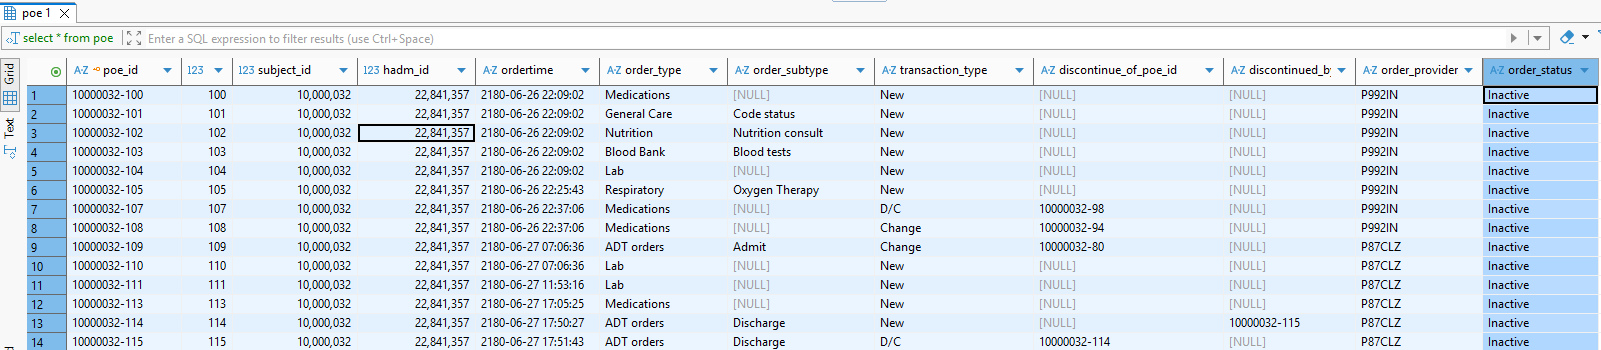

- **Bảng `poe_detail`** - Thông tin bổ sung cho các y lệnh.

Bảng poe_detail cung cấp thêm thông tin về các y lệnh POE. Bảng này sử dụng mô hình [Entity-Attribute-Value (EAV)](https://github.com/TruongDuyLongPTIT/Data-Driven-Hospital-EHR-Analysis/blob/main/Image/poe_detail_EAV_explained.png): entity là poe_id, attribute là field_name, và value là field_value. Các bảng EAV cho phép mô tả linh hoạt về entity khi các thuộc tính (attributes) không đồng nhất.

| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| poe_id | VARCHAR(25) NOT NULL | Mã định danh duy nhất cho lệnh y tế | Khóa chính liên kết với bảng poe để xác định lệnh y tế cụ thể. |
| poe_seq | INTEGER NOT NULL | Mỗi y lệnh có nhiều thành phần (xem dữ liệu để hiểu rõ hơn) | ***Trường này có vẻ hơi thừa*** |
| subject_id | INTEGER NOT NULL | Mã định danh duy nhất cho bệnh nhân | Liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| field_name | VARCHAR(255) NOT NULL | Mỗi dòng (row) cung cấp thông tin chi tiết về một khía cạnh cụ thể của một y lệnh POE. field_name là tên được gán cho khía cạnh đó. | [Bảng này](https://github.com/TruongDuyLongPTIT/Data-Driven-Hospital-EHR-Analysis/blob/main/Image/poe_detail_fieldnamevalue_explained.png) liệt kê các giá trị có thể có của field_name và giá trị thường gặp nhất của nó trong field_value (Giải thích thêm: [1](https://github.com/TruongDuyLongPTIT/Data-Driven-Hospital-EHR-Analysis/blob/main/Image/poe_detail_fieldnamevalue_explained_v2.png), [2](https://github.com/TruongDuyLongPTIT/Data-Driven-Hospital-EHR-Analysis/blob/main/Image/poe_detail_fieldnamevalue_explained_v3.png)) |
| field_value | TEXT | Giá trị của trường chi tiết | Giá trị cụ thể của trường, ví dụ: 500 mg, Oral, Daily, 7 days, Pain Management. Có thể để trống nếu không áp dụng. |

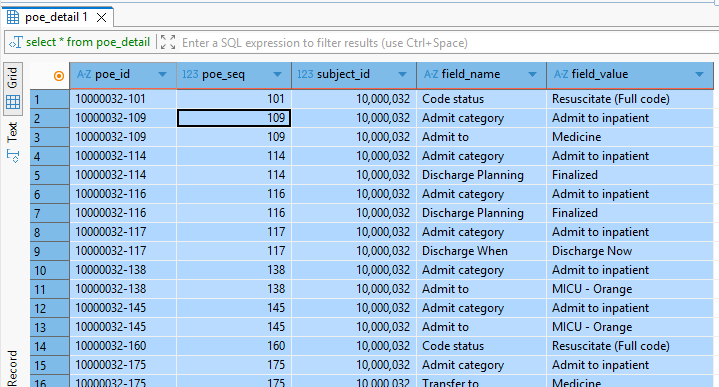

**! Note 1**: Bảng này khó có thể tạo ra PK dựa trên 1 tổ hợp thuộc tính (trừ khi lấy tất cả thuộc tính gộp thành PK thì mới duy trì được tính duy nhất), nhưng mà nếu làm như thế sẽ không hợp lý, và truy vấn sẽ không tối ưu, đánh index cũng sẽ không hiệu quả => **Cần tạo surrogate key (là 1 cột với giá trị số tăng tự động)**

###### **2.1.1.3. Thanh toán (Billing)**

- **Bảng `diagnoses_icd`** - Danh sách các chẩn đoán chính thức (official diagnoses).

Các chẩn đoán được **lập hóa đơn khi bệnh nhân xuất viện**, và được xác định bởi n**hân viên chuyên môn được đào tạo**, dựa trên việc đọc **các ghi chú lâm sàng đã được bác sĩ ký xác nhận.**

| **Trường**    | **Loại dữ liệu** | **Ý nghĩa**                              | **Mô tả**                                                                        |
| ------------- | ---------------- | ---------------------------------------- | -------------------------------------------------------------------------------- |
| subject_id (FK)  | INTEGER NOT NULL              | Mã định danh bệnh nhân                   | Liên kết với bảng `patients` để lấy thông tin nhân khẩu học.                     |
| hadm_id (FK) (PK)   | INTEGER NOT NULL              | Mã định danh của lần nhập viện           | Liên kết với bảng `admissions` để biết thông tin chi tiết lần nhập viện.         |
| seq_num  (PK)   | INTEGER NOT NULL              | Xếp hạng mức độ “quan trọng” của chẩn đoán | Nguyên tắc là: Chẩn đoán càng quan trọng, thì xếp thứ tự càng cao. |
| icd_code (FK)   | VARCHAR(7)           | Mã ICD chẩn đoán                         | Mã chẩn đoán theo hệ thống phân loại bệnh quốc tế (ICD = International Classification of Diseases).                   |
| icd_version (FK) | INTEGER NOT NULL              | Phiên bản ICD (ICD-10 chi tiết và cụ thể hơn ICD-9) .                          | Có tồn tại các bảng “mapping” (cross-walks) để chuyển đổi từ ICD-9 sang ICD-10.                               |


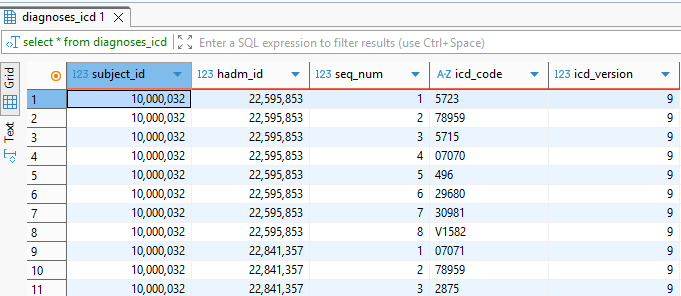

- **Bảng `d_icd_diagnoses`** - Là bảng từ điển (dictionary table) để tra cứu icd_code + icd_version = chuẩn đoán nào.

| Trường       | Loại dữ liệu | Ý nghĩa                 | Mô tả                                                                          |
| ------------ | ------------ | ----------------------- | ------------------------------------------------------------------------------ |
| icd\_code (PK)   | CHAR(7) NOT NULL       | Mã ICD                  | Mã chẩn đoán bệnh theo ICD (International Classification of Diseases).         |
| icd\_version (PK) | INTEGER NOT NULL          | Phiên bản ICD           | Xác định mã được lấy từ ICD-9 (9) hay ICD-10 (10).                             |
| long\_title  | VARCHAR(255)       | Mô tả đầy đủ của mã ICD | Cung cấp ý nghĩa của mã ICD. Ví dụ, mã ICD-9 0010 có long_title "Bệnh tả do vibrio cholerae". |


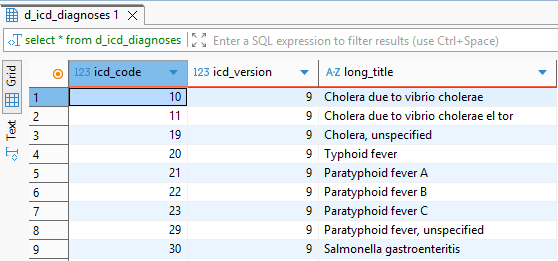

- **Bảng `procedures_icd`** - Bảng ghi nhận các thủ thuật, phẫu thuật (procedures) của bệnh nhân. ([2 bảng procedures_icd và procedureevents khác nhau như nào?](https://colab.research.google.com/drive/1v8-c4lQmuZ8DzVqNG7-wSgQjk3dYqHRE#scrollTo=lrEMFFDgleFc))

| Trường         | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| -------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)| INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến thủ thuật ICD.                           |
| hadm_id (PK)   | INTEGER NOT NULL          | Mã lần nhập viện                 | Định danh duy nhất cho lần nhập viện liên quan đến thủ thuật ICD.                      |
| seq_num        | INTEGER NOT NULL          | Số thứ tự thủ thuật cho biết thủ thuật nào được ghi nhận trước / quan trọng hơn.                | Thường seq_num = 1 là thủ thuật chính (primary procedure), các số sau (2, 3, …) là thủ thuật phụ.        |
| chartdate      | DATE NOT NULL         | Ngày thực hiện thủ thuật/phẫu thuật.                     | Tuy nhiên, ngày này không nhất thiết trùng khớp với thứ tự (seq_num).                                          |
| icd_code       | VARCHAR(7)       | Mã thủ thuật ICD                  | Mã chuẩn để định danh thủ thuật y tế theo hệ thống ICD (ví dụ: *"0W3P0ZZ"*).           |
| icd_version    | INTEGER NOT NULL          | Phiên bản ICD                     | Phiên bản của hệ thống ICD (9 = ICD-9, 10 = ICD-10), giúp phân biệt mã ở các phiên bản khác nhau. |

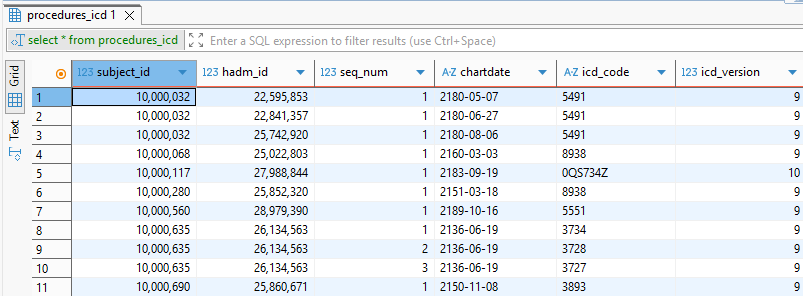

- **Bảng `d_icd_procedures`** - Là bảng từ điển (dictionary table) để tra cứu icd_code + icd_version = thủ thuật nào (tương tự bảng d_icd_diagnoses).

| Trường       | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                          |
| ------------ | ------------ | ------------------------ | ------------------------------------------------------------------------------ |
| icd\_code (PK)   | CHAR(7) NOT NULL       | Mã thủ thuật ICD         | Mã chuẩn để định danh thủ thuật y tế.                                          |
| icd\_version (PK) | INTEGER NOT NULL          | Phiên bản ICD            | 9 = ICD-9, 10 = ICD-10. Giúp phân biệt khi cùng một mã nhưng ở phiên bản khác. |
| long\_title  | VARCHAR(255)       | Mô tả chi tiết thủ thuật | Mô tả đầy đủ, dễ đọc về thủ thuật (ví dụ: *"Appendectomy, laparoscopic"*).     |


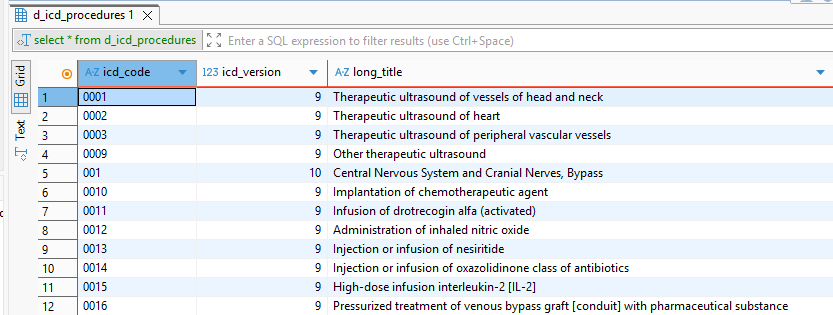

- **Bảng `drgcodes`** - DRG codes (Diagnosis Related Group codes) = Mã nhóm chẩn đoán liên quan.

  - Đây là mã mà bệnh viện dùng để *quy nhóm bệnh nhân*. **“Quy nhóm bệnh nhân”** nghĩa là: bệnh viện xếp các bệnh nhân có tình trạng bệnh tật và cách điều trị tương tự nhau vào cùng một nhóm để dễ quản lý và tính chi phí.
  - Các mã DRG (drgcode) được sử dụng để bệnh viện làm thủ tục thanh toán/nhận tiền bồi hoàn từ bảo hiểm hoặc cơ quan chi trả cho đợt nằm viện của bệnh nhân.
  - Mỗi DRG đại diện cho lý do chính mà bệnh nhân phải nhập viện (ví dụ: viêm phổi, phẫu thuật tim, thay khớp háng…).

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)   | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến mã DRG.                                  |
| hadm_id (PK)      | INTEGER NOT NULL          | Mã lượt nhập viện                 | Định danh duy nhất cho lượt nhập viện liên quan đến mã DRG.                             |
| drg_type          | VARCHAR(4)       | Loại hệ thống phân loại DRG được sử dụng cho mã DRG đó.                          | Vì trên thực tế có nhiều bộ quy tắc DRG khác nhau (ví dụ: Medicare DRG, All Patient DRG, v.v.), cột này cho biết mã DRG đang thuộc hệ thống nào.                        |
| drg_code          | VARCHAR(10)       | Mã DRG                            | Mã chuẩn để định danh nhóm chẩn đoán liên quan (Diagnosis Related Group).               |
| description       | VARCHAR(195)       | Mô tả chi tiết DRG                | Mô tả đầy đủ, dễ đọc về nhóm chẩn đoán tương ứng với drgcode (ví dụ: *"Heart failure & shock w CC"*).         |
| drg_severity      | SMALLINT          | Mức độ nặng của bệnh mà bệnh nhân mắc (severity of illness).           | Mức độ nghiêm trọng của nhóm chẩn đoán (ví dụ: 1-4, với 4 là nghiêm trọng nhất).        |
| drg_mortality     | SMALLINT          | Khả năng tử vong của bệnh nhân (likelihood of mortality).                | Mức độ nguy cơ tử vong liên quan đến nhóm chẩn đoán (ví dụ: 1-4, với 4 là cao nhất).    |

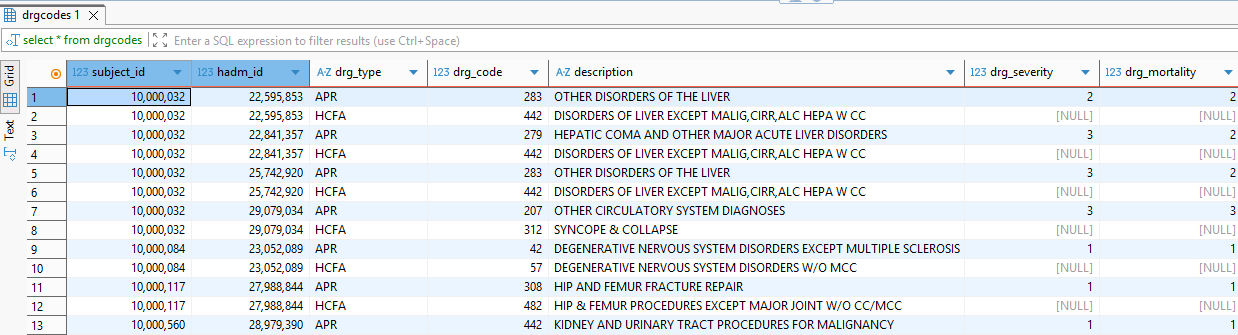

- **Bảng `hcpcevents`** - Các dịch vụ chi tiết đã dùng (X-quang, xét nghiệm, khám cấp cứu).

**! Tóm tắt lại cho dễ hiểu:**
  + **diagnoses_icd** → “Bệnh nhân bị bệnh gì?”

  + **procedures_icd** → “Bệnh nhân được làm thủ thuật/phẫu thuật gì?” => Để biết NVYT đã

  + **drgcodes** → “Nhóm DRG nào để bệnh viện quyết toán bảo hiểm?”

  + **hcpcsevents** → “Các dịch vụ chi tiết đã dùng (X-quang, xét nghiệm, khám cấp cứu, thủ thuật/phẫu thuật)?”

! Phân biệt **procedures_icd** và **hcpcevents**:

  + **procedures_icd** = ghi nhận thủ thuật y tế chính thức (theo chuẩn ICD, mang tính lâm sàng) => **procedures_icd = việc bác sĩ làm.**

  + **hcpcsevents** = ghi nhận dịch vụ cho mục đích tính tiền/billing (theo HCPCS/CPT, mang tính hành chính – tài chính) => **hcpcsevents = cái bệnh viện tính tiền.**

  + [So sánh 2 bảng](https://github.com/TruongDuyLongPTIT/Data-Driven-Hospital-EHR-Analysis/blob/main/Image/compare_procedure_icd_and_hcpcevents.png).


Phải thêm **surrogate key làm khóa chính** cho bảng này.

| Trường             | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                 |
| ------------------ | ------------ | ------------------------ | ------------------------------------------------------------------- |
| subject_id     (FK)    | INTEGER NOT NULL          | Mã bệnh nhân             | Liên kết với bảng patients                                         |
| hadm_id    (FK)        | INTEGER NOT NULL          | Mã nhập viện             | Liên kết với bảng admissions                                     |
| chartdate          | DATE         | Ngày thực hiện dịch vụ y tế  | Ngày thực hiện dịch vụ y tế                                |
| hcpcs_cd           | CHAR(5) NOT NULL       | hcpcs_cd là **mã gồm 5 ký tự** (số hoặc chữ + số) dùng để **xác định duy nhất một dịch vụ hoặc thủ thuật (event)**                 | Để biết chi tiết mô tả của mã này (dịch vụ cụ thể là gì), cần JOIN với bảng **d_hcpcs**                     |
| seq_num            | INTEGER NOT NULL          | Số thứ tự được gán cho các mã HCPCS trong một lần nằm viện                | **Chỉ giúp sắp xếp**, không đại diện cho độ ưu tiên hay tầm quan trọng của dịch vụ          |
| short_description  | VARCHAR(180)       | Mô tả tóm tắt nội dung của mã HCPCS tương ứng               | Ví dụ: hcpcs_cd = 71020 → mô tả ngắn: Chest X-ray, 2 views.                     |


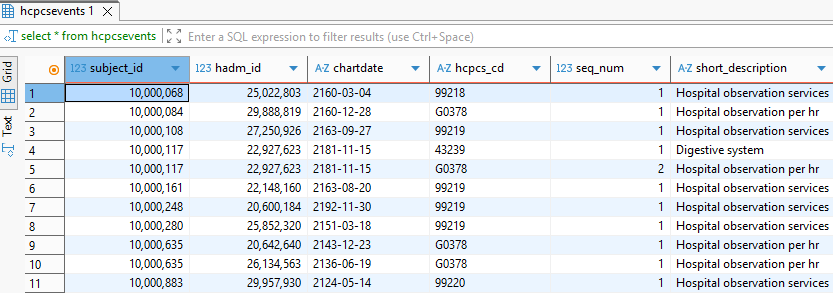

- **Bảng `d_hcpcs`** - Bảng từ điển, dùng để tra cứu mô tả chi tiết của từng mã trong `hcpcsevents`.

| Trường             | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                 |
| ------------------ | ------------ | ------------------------ | ------------------------------------------------------------------- |
| code     (PK)          | CHAR(5) NOT NULL       | Mã gồm 5 ký tự (chữ hoặc số) để xác định duy nhất một dịch vụ/thủ thuật (event)                 | Ví dụ: 71020, 93000, A0428                     |
| category           | SMALLINT       | Trả lời cho câu hỏi: Dịch vụ thuộc nhóm nào?   | Ví dụ: Radiology (chẩn đoán hình ảnh), Surgery (phẫu thuật), Lab (xét nghiệm)|
| short_description  | VARCHAR(180)       | Mô tả ngắn gọn, súc tích              | Ví dụ: **short_description**: Chest X-ray, 2 views (X-quang ngực, 2 tư thế)                    |
| long_description   | TEXT       | Mô tả đầy đủ, chi tiết           | Ví dụ: **long_description**: Radiologic examination, chest; 2 views, frontal and lateral (Khám X-quang ngực; 2 tư thế, thẳng và nghiêng)             |


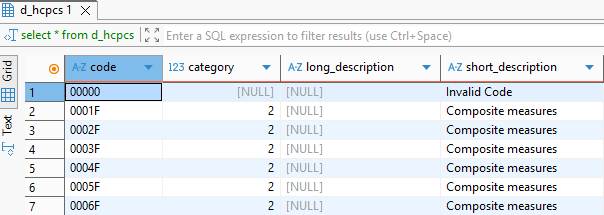

###### **2.1.1.4. Đo lường (Measurements)**

- **Bảng `microbiologyevents`** - Lưu trữ các sự kiện **xét nghiệm vi sinh** (là thủ thuật phổ biến để **kiểm tra xem có sự phát triển của vi khuẩn/nấm gây bệnh không**, và **đánh giá kháng sinh nào hiệu quả nhất**). [Để cho dễ hiểu, nên đọc qua link này trước.](https://colab.research.google.com/drive/15hDQEx1EFE_ea6NFmSALoRKJj41vuWlX#scrollTo=MZSNtUpc_5Ki)

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| microevent_id (PK) | INTEGER NOT NULL          | Mã ID sự kiện vi sinh                | Định danh duy nhất cho mỗi **sự kiện vi sinh**, như xét nghiệm hoặc nuôi cấy vi khuẩn.       |
| subject_id        | INTEGER NOT NULL          | Mã ID  bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến sự kiện vi sinh.                         |
| hadm_id           | INTEGER          | Mã ID lượt nhập viện                 | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến sự kiện vi sinh.      |
| micro_specimen_id | INTEGER NOT NULL          | Mã ID định danh duy nhất cho **mẫu xét nghiệm vi sinh** (ví dụ: máu, nước tiểu, đờm)                 |       Dùng để nhóm tất cả các kết quả liên quan đến cùng một mẫu (ví dụ: một mẫu máu có thể cho kết quả nhiều loại vi khuẩn khác nhau, và nhiều loại kháng sinh thử nghiệm).      |
| order_provider_id | VARCHAR(10)       | Mã ID định danh của bác sĩ/người ra lệnh thực hiện xét nghiệm vi sinh       | Định dạng luôn bắt đầu bằng “P”, theo sau là số và chữ (ví dụ: P003AB, P00102)                |
| chartdate         | TIMESTAMP(0) NOT NULL         | Ngày sự kiện vi sinh được ghi nhận trong hồ sơ y tế                     | → Luôn có chartdate, nhưng không phải lúc nào cũng có charttime.                                    |
| charttime         | TIMESTAMP(0)    | Thời gian cụ thể sự kiện vi sinh được ghi nhận trong hồ sơ y tế.                | Có thể coi như “thời điểm thực tế xét nghiệm diễn ra”                        |
| spec_itemid       | INTEGER NOT NULL          | Mã ID loại mẫu sinh học  được đem đi xét nghiệm                      | Định danh loại mẫu xét nghiệm (ví dụ: mã cho máu, đờm, nước tiểu).                      |
| spec_type_desc    | VARCHAR(100) NOT NULL       | Mô tả loại mẫu sinh học được đem đi xét nghiệm                    | Ví dụ: *"Blood (máu)"*, *"Urine (nước tiểu)"*, *"Sputum(đờm/dịch cơ thể)"*).        |
| test_seq          | INTEGER NOT NULL          | Dùng khi **cùng một loại specimen** nhưng có nhiều chai/mẫu nhỏ được nuôi cấy riêng.           | Ví dụ: khi làm cấy máu, người ta thường lấy chai hiếu khí (aerobic) và chai kỵ khí (anaerobic). Hai chai này có thể cùng spec_type_desc = "Blood" nhưng khác test_seq (1, 2).                            |
| storedate         | TIMESTAMP(0)         | Thời điểm kết quả cuối cùng được lưu vào hệ thống                      | Trong quá trình nuôi cấy, có thể có kết quả tạm thời (interim), nhưng ở đây họ lưu thời gian cập nhật cuối cùng                                                       |
| storetime         | TIMESTAMP(0)    | Thời gian lưu trữ chính xác                | storetime = storedate + thời điểm chính xác (hour:minute:seconds)                                           |
| test_itemid       | INTEGER NOT NULL	          | Mã định danh duy nhất cho loại xét nghiệm vi sinh được thực hiện                     |            Nôm na, test_itemid là ID của 1 loại xét nhiệm              |
| test_name         | VARCHAR(100)       | Tên xét nghiệm                    | Tên của xét nghiệm vi sinh (ví dụ: *"Blood culture"*, *"Urine culture"*).               |
| org_itemid        | INTEGER          | Mã ID của vi sinh vật                    | Mã định danh cho vi sinh vật được phát hiện trong quá trình nuôi cấy. Nếu org_itemid = NULL → nghĩa là kết quả âm tính, không có vi khuẩn (org_name đương nhiên cũng sẽ NULL)                    |
| org_name          | VARCHAR(100)       | Tên vi sinh vật                   | Tên của vi sinh vật phát hiện được (ví dụ: *"Escherichia coli"*, *"Staphylococcus aureus"*).
| isolate_num       | SMALLINT          | Chỉ số (1, 2, 3, …) phân biệt các dòng vi khuẩn được tách ra từ cùng một mẫu.                | Ví dụ: từ một mẫu máu có thể nuôi cấy ra 2 loại vi khuẩn khác nhau (E. coli và Staphylococcus aureus). Thì E. coli = isolate_num = 1 và Staph aureus = isolate_num = 2                                          |
| quantity          | VARCHAR(50)       | Số lượng vi sinh vật              | Mô tả số lượng vi sinh vật được phát hiện (nếu có).                                     |
| ab_itemid         | INTEGER          | Mã kháng sinh                     | Định danh duy nhất cho kháng sinh được thử nghiệm trong kiểm tra kháng sinh.            |
| ab_name           | VARCHAR(30)       | Tên kháng sinh                    | Tên của kháng sinh được thử nghiệm (ví dụ: *"Amoxicillin"*, *"Vancomycin"*).            |
| dilution_text     | VARCHAR(10)       | Đây là thông tin về **MIC (Minimum Inhibitory Concentration – nồng độ ức chế tối thiểu)**    | Cho biết nồng độ kháng sinh tối thiểu để ức chế vi khuẩn (Để dùng cho phù hợp tránh dùng quá liều, kháng kháng sinh) |
| dilution_comparison | VARCHAR(20)     | Toán tử so sánh độ nhạy  (được tách ra từ dilution_text cho dễ query)         | Toán tử so sánh trong thử nghiệm độ nhạy kháng sinh (ví dụ: *">"*, *"<"*, *"="*).       |
| dilution_value    | DOUBLE PRECISION        | Giá trị độ nhạy kháng sinh (được tách ra từ dilution_text cho dễ query)        | Giá trị định lượng của nồng độ ức chế tối thiểu (MIC) trong thử nghiệm kháng sinh. |
||||**Ví dụ: dilution_text = "<=2", dilution_comparison = "<=", dilution_value = 2 => Nghĩa là: vi khuẩn bị ức chế ở nồng độ ≤ 2 µg/mL**     |
| interpretation    | VARCHAR(5)       | Diễn giải kết quả xét nghiệm hoặc thử kháng sinh - dựa trên chuẩn CLSI/EUCAST               | **Ví dụ: S = Susceptible (nhạy, dùng được thuốc này)/I = Intermediate (trung gian, chưa chắc hiệu quả)/ R = Resistant (kháng thuốc, không nên dùng)**   |
| comments          | TEXT       | ghi chú dạng văn bản tự do (free-text) do nhân viên y tế nhập khi làm xét nghiệm vi sinh                          | **Nội dung thường là:**
|||| -> Thông tin thêm về mẫu bệnh phẩm (ví dụ: “mẫu bị rò rỉ”, “mẫu lấy không đủ thể tích”)
|||| -> Ghi nhận việc đã thông báo kết quả cho bác sĩ điều trị
|||| -> Các lưu ý để diễn giải kết quả (ví dụ: “có thể do tạp nhiễm”, “cần đối chiếu lâm sàng”)
|||| -> Đôi khi chứa luôn cả kết quả xét nghiệm nếu không nhập được vào các cột chuẩn

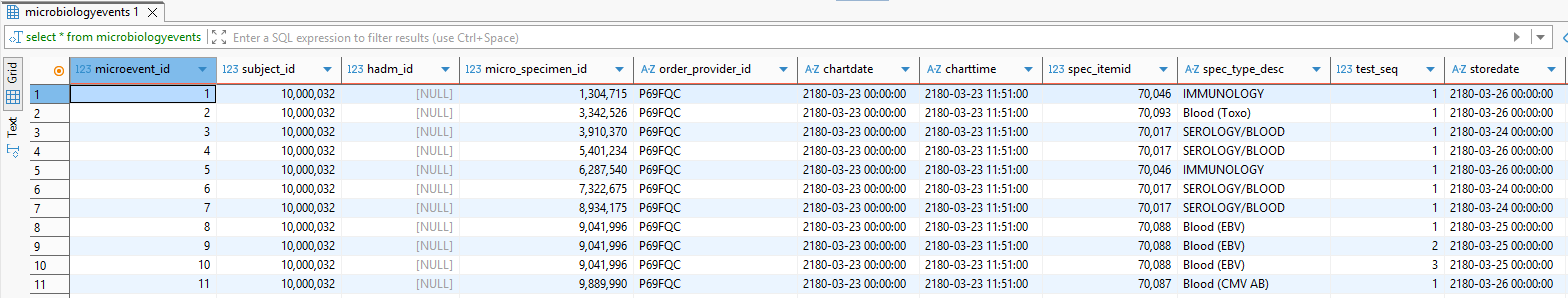

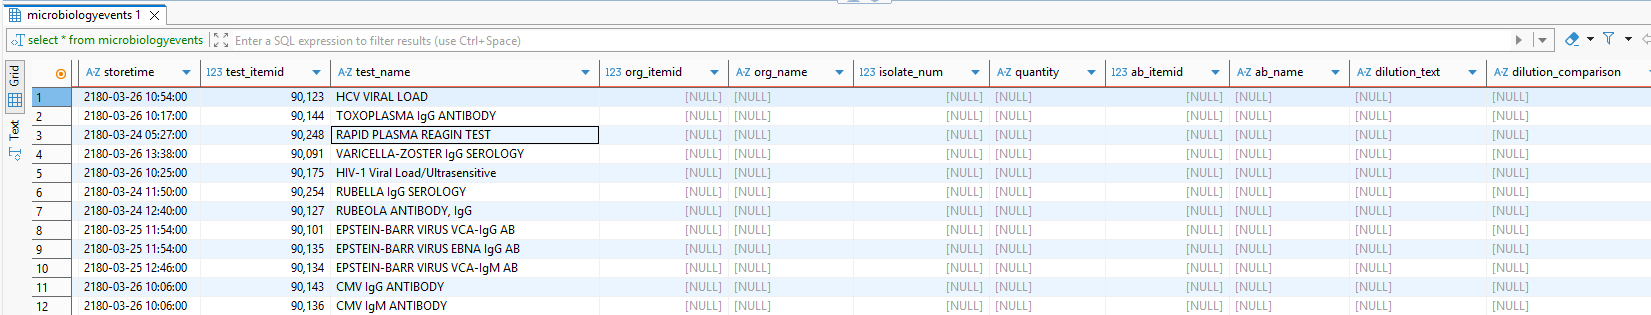

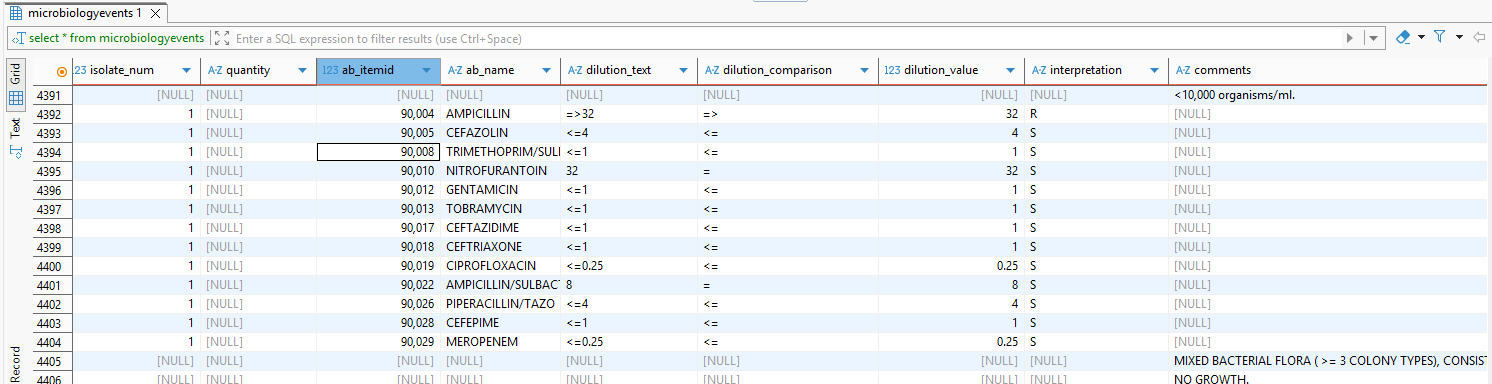

- **Bảng `labevents`** - Đây là bảng lưu **toàn bộ kết quả xét nghiệm labo** (laboratory measurements) của **một bệnh nhân cụ thể**. Đây là **các xét nghiệm thường quy / hóa sinh / huyết học / khí máu...** (khác với **xét nghiệm vi sinh** ở bảng **microbiologyevents**).

  🔬 **Các loại xét nghiệm có trong labevents:**

    + **Hematology**: công thức máu, tiểu cầu, Hct, Hb, bạch cầu...

    + **Blood gases**: khí máu động mạch (pH, PaO₂, PaCO₂, HCO₃⁻...).

    + **Chemistry panels**: điện giải (Na, K, Cl), creatinine, glucose, men gan, lipid...

    + **Ít gặp hơn**: xét nghiệm di truyền, test đặc biệt.

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| labevent_id (PK)  | INTEGER NOT NULL          | Mã ID sự kiện xét nghiệm             | Định danh duy nhất cho mỗi sự kiện xét nghiệm trong phòng thí nghiệm.                   |
| subject_id        | INTEGER NOT NULL          | Mã ID bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến sự kiện xét nghiệm.                    |
| hadm_id           | INTEGER          | Mã ID lượt nhập viện                 | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến sự kiện xét nghiệm.   |
| specimen_id       | INTEGER NOT NULL          | Mã ID duy nhất cho mẫu bệnh phẩm (ví dụ: máu, nước tiểu, dịch não tủy).                 | Dùng để nhóm các xét nghiệm được làm trên cùng một mẫu (ví dụ: một mẫu máu → đo nhiều chỉ số như pH, pCO₂, HCO₃⁻).          |
| itemid            | INTEGER NOT NULL          | Mã ID định danh duy nhất cho loại xét nghiệm (lab test)            | Định danh duy nhất cho loại xét nghiệm được thực hiện (ví dụ: xét nghiệm glucose, hematocrit). Thông tin chi tiết về **itemid** nằm ở bảng **d_labitems**. |
| order_provider_id | VARCHAR(10)       | 	Mã ID định danh của bác sĩ/người ra lệnh thực hiện xét nghiệm       | Có dạng **P + số + chữ/số** (ví dụ: P003AB, P1248B).                |
| charttime         | TIMESTAMP(0)    | Thời gian mẫu được lấy/ghi nhận                | Thời gian cụ thể sự kiện xét nghiệm được ghi nhận trong hồ sơ y tế.                      |
| storetime         | TIMESTAMP(0)    | Thời điểm dữ liệu thực sự lưu trữ vào database. Đây là thời điểm mà bác sĩ và điều dưỡng có thể xem được kết quả trên hệ thống                | Ví dụ: máu được ghi nhận lấy lúc 08:00 (**charttime**), nhưng dữ liệu được thực sự lưu vào database vào lúc 09:15 (**storetime**).                                           |
| value             | VARCHAR(200)       | Kết quả xét nghiệm gốc               | Giá trị kết quả xét nghiệm gốc dưới dạng chuỗi (có thể là số, văn bản hoặc trạng thái).     |
| valuenum          | DOUBLE PRECISION        | Nếu kết quả (value) là số thì hệ thống sẽ tự ép kiểu sang dạng số để dễ phân tích             | Ví dụ: “4.5 mmol/L” → valuenum = 4.5. Còn nếu không thể ép sang dạng số thì sẽ để giá trị **NULL**.            |
| valueuom          | VARCHAR(20)       | Đơn vị đo                         | Đơn vị đo của giá trị xét nghiệm (ví dụ: *"mg/dL"*, *"mmol/L"*).                       |
| ref_range_lower   | DOUBLE PRECISION        | Giới hạn **dưới** của "khoảng bình thường"          | Ví dụ: Natri (Na⁺): 135 – 145 mmol/L. Thì **ref_range_lower** = 135           |
| ref_range_upper   | DOUBLE PRECISION        | Giới hạn **trên** của "khoảng bình thường"          | Và **ref_range_upper** = 145. Kết quả nằm ngoài khoảng [ref_range_lower, ref_range_upper] thì là bất thường.           |
| flag              | VARCHAR(10)       | Cờ đánh dấu nhanh tình trạng kết quả                     | Ví dụ: "abnormal", "high", "low", hoặc NULL nếu bình thường.           |
| priority          | VARCHAR(7)       | Độ ưu tiên của xét nghiệm                    | **"routine" = thường quy / "stat" = khẩn cấp (cần kết quả ngay để quyết định điều trị)** / cũng có thể là NULL (không có thông tin về độ ưu tiên)                           |
| comments          | TEXT       | Ghi chú                           | Ghi chú bổ sung liên quan đến sự kiện xét nghiệm hoặc kết quả.                          |

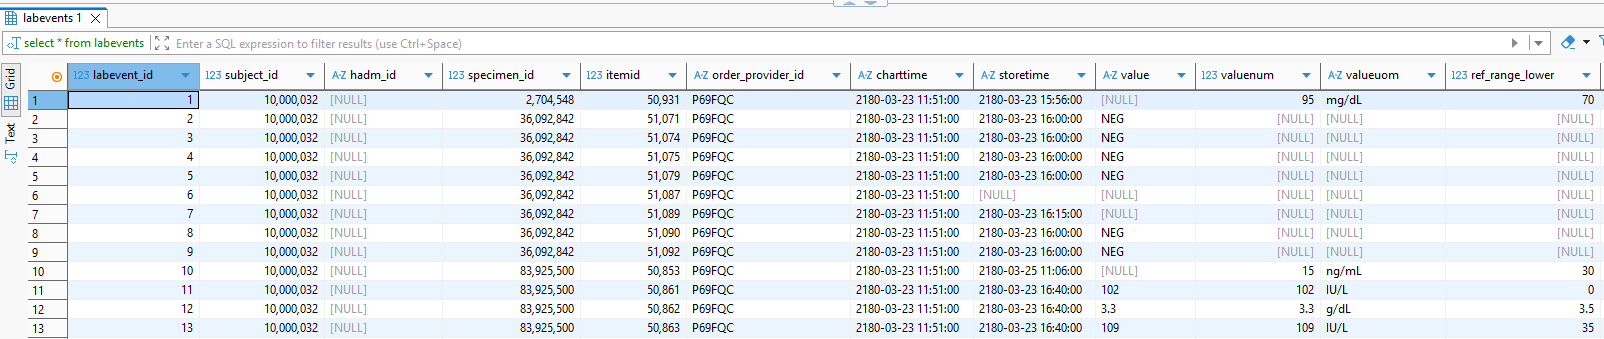

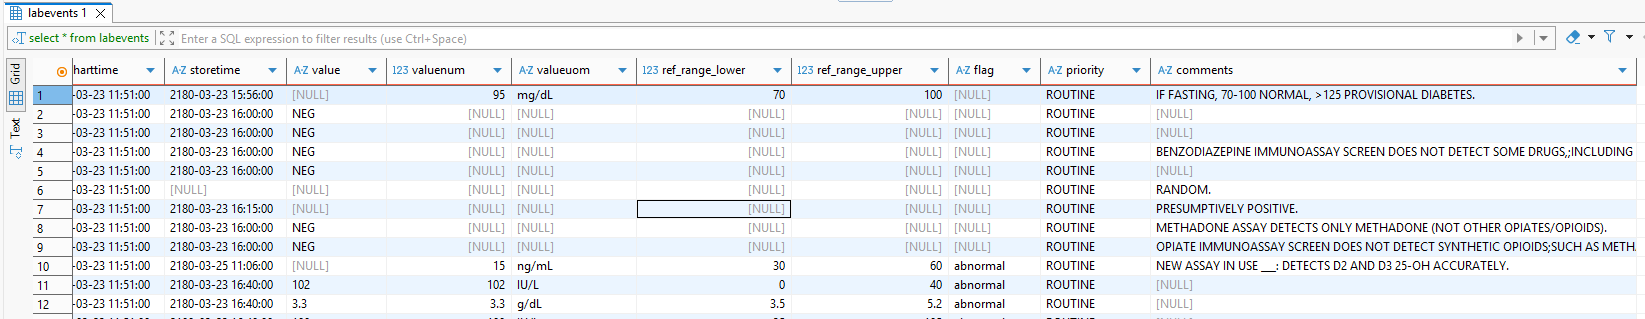

- **Bảng `d_labitems` - Bảng từ điển định nghĩa các loại xét nghiệm**, giúp diễn giải **itemid** trong **labevents**.

| Trường       | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                          |
| ------------ | ------------ | ------------------------ | ------------------------------------------------------------------------------ |
| itemid (PK)  | INTEGER NOT NULL          | Mã ID định danh duy nhất cho từng loại xét nghiệm   | Dùng để **liên kết** với bảng **labevents** (nơi lưu kết quả cụ thể) |
| label        | VARCHAR(50)       | Tên của xét nghiệm           | Mô tả ngắn gọn **concept** mà **itemid đại diện**.             |
| fluid        | VARCHAR(50)       | Cho biết mẫu vật (chất lỏng sinh học) dùng để làm xét nghiệm      | Nhờ có cột này, ta phân biệt được cùng một xét nghiệm nhưng khác mẫu vật (Ví dụ: Glucose trong máu ≠ Glucose trong nước tiểu). |
| category     | VARCHAR(50)       | Nhóm cấp cao hơn để phân loại loại xét nghiệm      | **Ví dụ:**  |
|||| **ABG (Arterial Blood Gas)** → khí máu động mạch
|||| **Chemistry** → hóa sinh
|||| **Hematology** → huyết học
|||| **Urinalysis** → phân tích nước tiểu

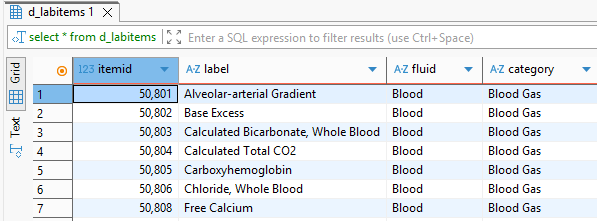

- **Bảng `omr`** - Bảng **đo lường sức khỏe tổng quát** của bệnh nhân trong các lần khám, **không chỉ trong lúc nhập viện (tức là khám xong đi về vẫn được ghi lại - đó là lý do bảng này không có hadm_id)**.


- Chủ yếu ghi nhận **số liệu** của bệnh nhân khi **khám ngoại trú (outpatient)**, ví dụ:

  + **Huyết áp (blood pressure)**

  + **Cân nặng (weight)**

  + **Chiều cao (height)**

  + **Chỉ số khối cơ thể (BMI)**

| Trường         | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| -------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến kết quả đo lường hoặc ghi nhận.          |
| chartdate      | DATE NOT NULL         | Ngày ghi nhận                     | Ngày kết quả được ghi nhận trong hồ sơ y tế.                                            |
| seq_num        | INTEGER NOT NULL          | Một số nguyên tăng dần, dùng để phân biệt thứ tự các kết quả cùng loại trong cùng một ngày                 | **Ví dụ:** bệnh nhân đo huyết áp 2 lần trong ngày 2025-09-13 → **lần đầu seq_num = 1, lần sau seq_num = 2**                 |
| result_name    | VARCHAR(100) NOT NULL       | Tên của các phép đo sức khỏe cơ bản                       | **Ví dụ**: “Blood Pressure”, “Weight”, “Height”, “BMI”.         |
| result_value   | TEXT NOT NULL       | Đây là giá trị kết quả thực tế được ghi lại cho từng phép đo trong hồ sơ y tế điện tử (EHR).                   | Giá trị của kết quả đo lường hoặc ghi nhận.  Nó phụ thuộc vào **result_name** .Ví dụ:
|||| result_name = 'Blood Pressure' → result_value có thể là "120/80", "130/70")
|||| result_name = 'Weight (Lbs)' → result_value có thể là "150" (pounds)
|||| result_name = 'BMI (kg/m2)' → result_value có thể là "26.6"        |

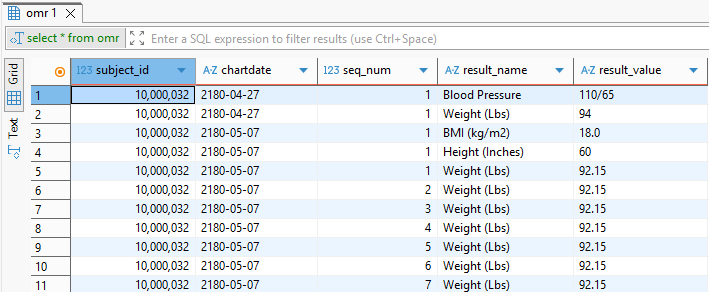

###### **2.1.1.5. Thuốc (Medication)** - [Luồng logic/mối liên hệ và vai trò của 4 bảng poe/prescriptions/pharmacy/emar](https://colab.research.google.com/drive/1owjFJh6N6P9CF2en5GST-36e-qghEduc#scrollTo=CqZs8Zmsuu3M).

- **Bảng `prescriptions`** - Lưu trữ **toàn bộ các đơn thuốc (prescribed medications) mà bệnh nhân được bác sĩ kê trong quá trình nằm viện**. Đây là **bảng lõi về y lệnh thuốc**, có thể coi là cầu nối giữa **y lệnh nhập vào (poe/poe_detail)** và **thực hiện thuốc (pharmacy, emar/emar_detail)**

| Trường              | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ------------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)     | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến đơn thuốc.                               |
| hadm_id             | INTEGER NOT NULL          | Mã lượt nhập viện                 | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến đơn thuốc.            |
| pharmacy_id         | INTEGER NOT NULL       | Mã đơn thuốc                      | Định danh duy nhất cho đơn thuốc được cấp phát.                                         |
| poe_id              | VARCHAR(25)       | Mã lệnh y khoa                    | Định danh duy nhất cho lệnh y khoa (Provider Order Entry) liên quan đến đơn thuốc.      |
| poe_seq             | INTEGER          | Số thứ tự lệnh y khoa             | Thứ tự của lệnh y khoa trong chuỗi các lệnh liên quan đến đơn thuốc.                    |
| order_provider_id   | VARCHAR(10)       | Mã ID định danh ẩn danh của bác sĩ/cán bộ y tế đã kê đơn                   | Định danh người kê đơn thuốc (ví dụ: bác sĩ hoặc nhân viên y tế).                      |
| starttime           | TIMESTAMP(3)    | Thời gian bắt đầu sử dụng thuốc                | Thời gian bắt đầu sử dụng thuốc theo đơn.                                               |
| stoptime            | TIMESTAMP(3)    | Thời gian kết thúc sử dụng thuốc               | Thời gian kết thúc sử dụng thuốc theo đơn.                                              |
| drug_type           | VARCHAR(20) NOT NULL       | Vai trò của các loại thuốc được kê trong đơn                        | **Các vai trò gồm có**:
|||| **MAIN**: thuốc chính (thuốc được kê trực tiếp).
|||| **BASE**: dung môi, nền (ví dụ: nước muối sinh lý để pha).
|||| **ADDITIVE**: chất thêm vào (ví dụ: thuốc pha chung vào dịch truyền).                       |
| drug                | VARCHAR(255) NOT NULL       | Mô tả tự do (free-text) tên thuốc mà bệnh nhân được chỉ định                         | Tên chung hoặc thương mại của thuốc (ví dụ: *"Paracetamol"*, *"Aspirin"*).             |
| formulary_drug_cd   | VARCHAR(50)       | Mã định danh thuốc trong danh mục thuốc của bệnh viện (mã này dùng nội bộ thôi)           | → Mã thuốc nội bộ theo danh mục của bệnh viện (formulary) để chuẩn hóa việc đặt thuốc.              |
| gsn (Generic Sequence Number)                | VARCHAR(255)       | Mã số chung                       | Mã chuẩn (GSN) dùng để định danh thuốc theo thành phần hoạt chất, thường áp dụng trong dữ liệu dược.            |
| ndc (National Drug Code)                | VARCHAR(25)       | Mã thuốc quốc gia của Mỹ                 | Mã thuốc quốc gia của Mỹ, định danh duy nhất từng loại thuốc theo FDA       |
| prod_strength       | VARCHAR(255)       | Nồng độ sản phẩm                  | Mô tả hàm lượng hoặc nồng độ thuốc dưới dạng tự do, ví dụ: “12 mg / 0.8 mL Oral Syringe”, “12.5 mg Tablet”                    |
| form_rx             | VARCHAR(25)       | Dạng bào chế                      | Dạng bào chế hoặc vật chứa mà liều thuốc được cung cấp, ví dụ: “TABLET”, “VIAL”, “ORAL SYRINGE”.                   |
| dose_val_rx         | VARCHAR(100)       | Liều lượng được kê cho bệnh nhân trong khoảng thời gian chỉ định.               | Giá trị liều lượng thuốc được kê trong đơn (ví dụ: *"500"*, *"10"*).                   |
| dose_unit_rx        | VARCHAR(50)       | Đơn vị đo cho liều lượng trên               | Ví dụ: mg, mL                                     |
| form_val_disp       | VARCHAR(50)       | Hàm lượng có trong một đơn vị thuốc theo danh mục (formulary)                 | Nói cách khác: mỗi viên/mỗi ống chứa bao nhiêu hoạt chất. (Ví dụ: 250)                        |
| form_unit_disp      | VARCHAR(50)       | Đơn vị đo của form_val_disp                  | Ví dụ: mg, mL.                   |
| doses_per_24_hrs    | REAL          | Số lần thuốc được dùng trong 24 giờ                | 1 → dùng 1 lần/ngày.
|||| 2 → BID (2 lần/ngày).
|||| 3 → TID (3 lần/ngày).
|||| 4 → QID (4 lần/ngày).                                |
| route               | VARCHAR(50)       | Đường dùng thuốc (cách đưa thuốc vào cơ thể)                  | Ví dụ: PO (uống), IV (tiêm truyền tĩnh mạch), IM (tiêm bắp), SC (dưới da), TOP (bôi ngoài da).                           |

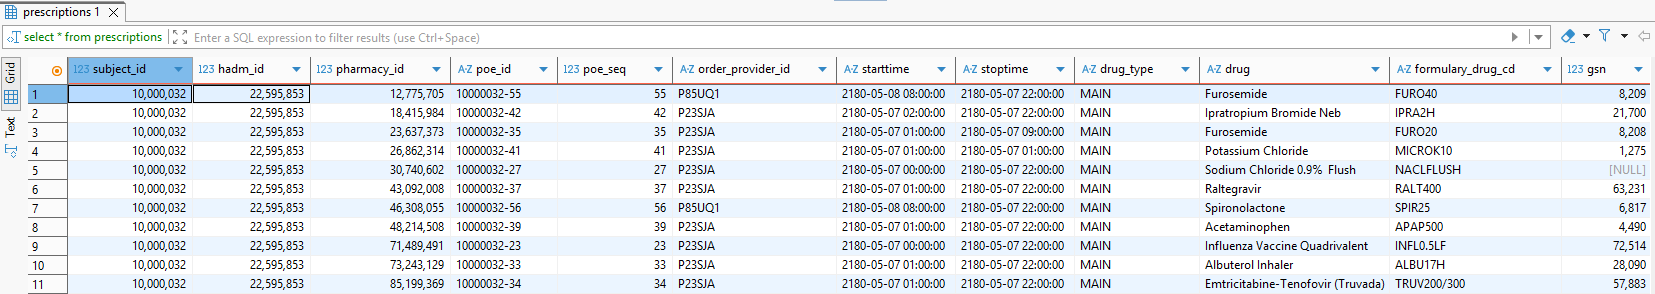

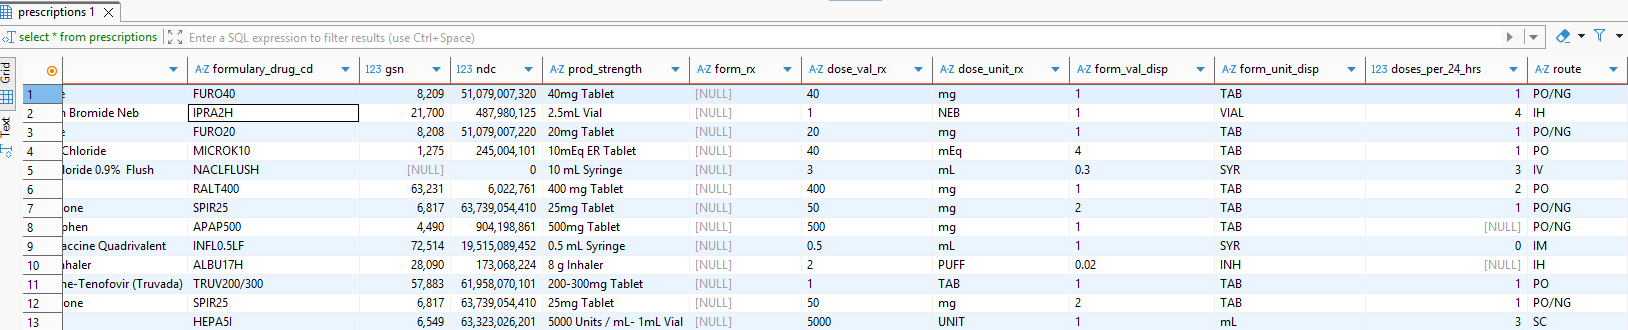

- **Bảng `pharmacy`** - **Thông tin quản lý thuốc được phát/chuẩn bị bởi khoa dược**, liên quan đến các đơn thuốc (**prescriptions**)

| Trường              | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ------------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)     | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến thông tin đơn thuốc.                     |
| hadm_id             | INTEGER NOT NULL          | Mã lượt nhập viện                 | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến đơn thuốc.            |
| pharmacy_id (PK)    | INTEGER NOT NULL       | Mã định danh duy nhất cho mỗi dòng trong bảng **pharmacy**                      | Dùng để liên kết sang **poe (y lệnh)**, **prescriptions (đơn thuốc chuẩn hóa)**, hoặc **emar (lần cấp thuốc)**                                         |
| poe_id              | VARCHAR(25)       | Mã lệnh y khoa                    | Định danh duy nhất cho lệnh y khoa (Provider Order Entry) liên quan đến đơn thuốc.      |
| starttime           | TIMESTAMP(3)    | Thời gian bắt đầu                 | Thời gian bắt đầu sử dụng thuốc theo đơn.                                               |
| stoptime            | TIMESTAMP(3)    | Thời gian kết thúc                | Thời gian kết thúc sử dụng thuốc theo đơn.                                              |
| medication          | TEXT       | Tên thuốc                         | Tên thuốc như được chuẩn hóa trong hệ thống pharmacy.                  |
| proc_type           | VARCHAR(50) NOT NULL       | Kiểu đơn thuốc/loại cấp phát                    | Thường có các giá trị chuẩn hóa như:
||||"**IV Piggyback**": thuốc truyền nhỏ giọt thêm vào dịch.
|||| "**Unit Dose**": dạng liều đơn vị (viên, ống, lọ…).
|||| "**Non-formulary**": thuốc không nằm trong danh mục chuẩn (formulary) của bệnh viện.                           |
| status              | VARCHAR(50)       | Trạng thái đơn thuốc               | Trạng thái của đơn thuốc (ví dụ: *"Active"*, *"Discontinued"*, *"Pending"*).            |
| entertime           | TIMESTAMP(3) NOT NULL    | Thời gian nhập liệu               | Thời gian đơn thuốc được nhập vào hệ thống.                                             |
| verifiedtime        | TIMESTAMP(3)    | Thời gian xác minh                | Thời gian đơn thuốc được xác minh bởi dược sĩ hoặc nhân viên y tế.                      |
| route               | VARCHAR(50)       | Đường dùng dự kiến của thuốc.                  | Có thể ở dạng shorthand (viết tắt kiểu lâm sàng):
|||| **IV** (intravenous – truyền tĩnh mạch)
|||| **PO** (per os – uống)
|||| **IM** (intramuscular – tiêm bắp)
|||| **SC** (subcutaneous – tiêm dưới da)                           |
| frequency           | VARCHAR(50)       | Tần suất dùng thuốc                  | Tần suất sử dụng thuốc (ví dụ: *"Once daily"*, *"Every 6 hours"*).                      |
| disp_sched          | VARCHAR(255)       | Lịch phân phối                    | Ví dụ: "08,20" = uống/lấy thuốc lúc 8 giờ sáng và 8 giờ tối.                           |
| infusion_type       | VARCHAR(15)       | Mã ký tự chỉ kiểu truyền thuốc                  | Một số giá trị:
|||| **B = Bolus** (tiêm nhanh/liều lớn trong thời gian ngắn)
|||| **C = Continuous** (truyền liên tục)
|||| **N, N1** = các biến thể khác (trong một số hệ thống dùng cho “**intermittent infusion**” – truyền ngắt quãng)
|||| **O = Other**
|||| **R = Rate-based** (có tốc độ cụ thể, ví dụ mL/hr)                        |
| sliding_scale       | VARCHAR(1)       | Chỉ ra thuốc có được cho theo thang điều chỉnh liều (sliding scale) hay không?              | Chỉ báo nếu đơn thuốc sử dụng thang liều linh hoạt (ví dụ: *"Yes"*, *"No"*).            |
| lockout_interval    | VARCHAR(50)       | Khoảng thời gian khóa             | Khoảng thời gian khóa giữa các liều (thường dùng cho thuốc giảm đau, ví dụ: *"2 hours"*). |
| basal_rate          | REAL        | Tốc độ truyền cơ bản              | Tốc độ truyền cơ bản cho thuốc truyền dịch (ví dụ: 10 mL/giờ).                          |
| one_hr_max          | VARCHAR(10)        | Liều tối đa có thể dùng trong 1 giờ            | Liều tối đa được phép sử dụng trong 1 giờ (nếu áp dụng).                                |
| doses_per_24_hrs    | REAL          | Số liều dự kiến trong 24 giờ                | Với thuốc truyền liên tục, con số này có thể gây hiểu nhầm (vì chỉ có 1 “liều” duy nhất nhưng truyền liên tục cả ngày)                                                |
| duration            | REAL          | Thời gian điều trị được chỉ định (dạng số)                 | **Ví dụ 1**: duration = 1, duration_interval = "Doses" → chỉ định dùng 1 liều duy nhất                                      |
| duration_interval   | VARCHAR(50)       | Đơn vị thời gian sử dụng (dạng chuỗi)         | **Ví dụ 2**: duration = 8, duration_interval = "Weeks" → điều trị kéo dài 8 tuần                               |
| expiration_value    | INTEGER          | Giá trị hết hạn                   | Giá trị thời gian trước khi đơn thuốc hết hạn (ví dụ: 30).                              |
| expiration_unit     | VARCHAR(50)       | Đơn vị hết hạn                    | Đơn vị thời gian hết hạn của đơn thuốc (ví dụ: *"Days"*, *"Weeks"*).                    |
| expirationdate      | TIMESTAMP(3)         | Ngày hết hạn                      | Ngày cụ thể đơn thuốc hết hạn.                                                          |
| dispensation         | VARCHAR(50)       | Phương thức phân phối             | Nguồn cấp phát thuốc (Ví dụ từ: central pharmacy, unit dose system, floor stock)               |
| fill_quantity       | VARCHAR(50)        | Tỷ lệ cấp phát so với đơn thuốc gốc                 | **Ví dụ**: bác sĩ kê 100 viên nhưng kho chỉ phát trước 30 viên → fill_quantity = 0.3.                    |

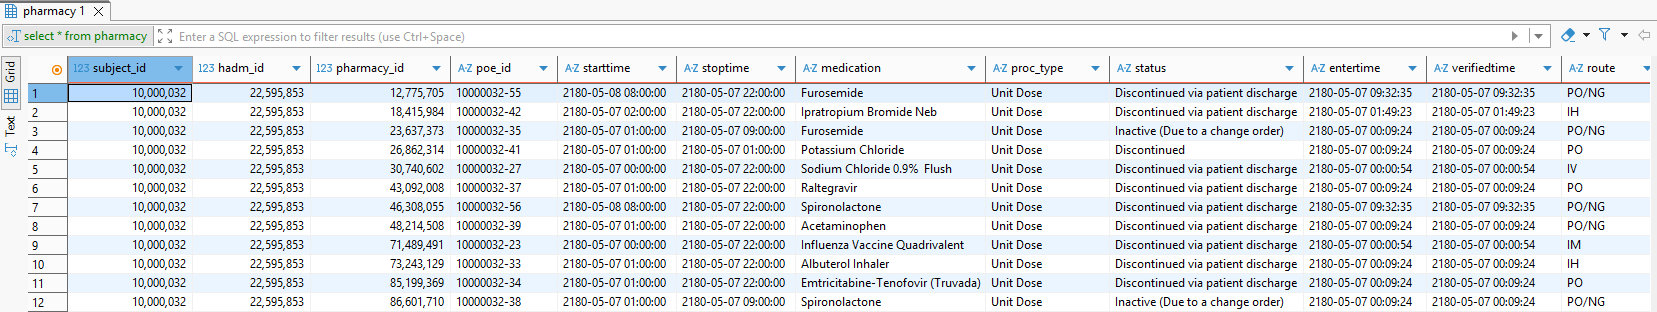

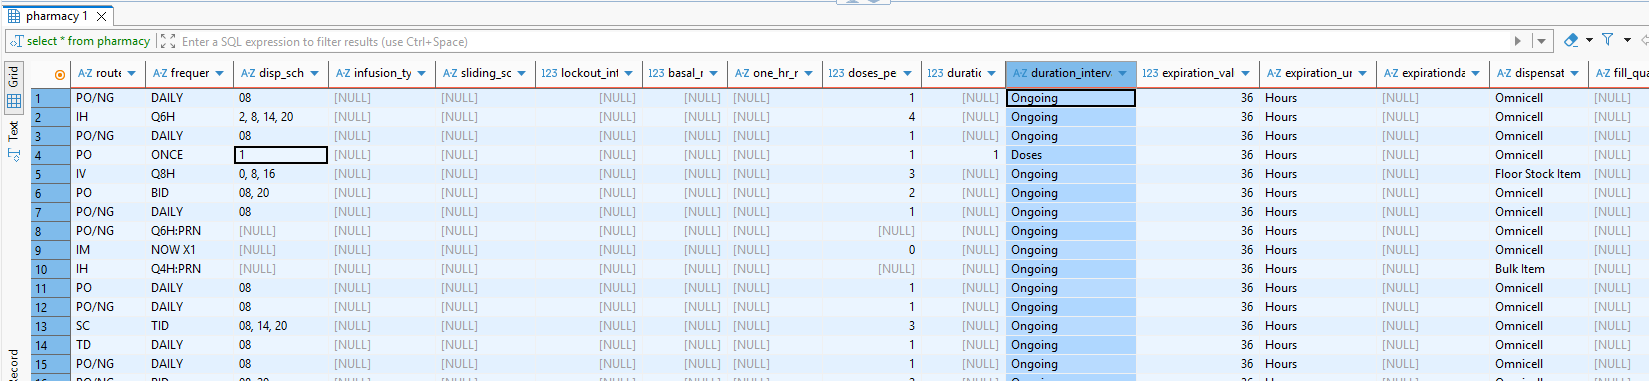

- **Bảng `emar` (Electronic Medicine Administration Record)** - Nhật ký điện tử **ghi lại các lần bệnh nhân được cấp thuốc THỰC TẾ**, dựa trên việc quét mã vạch thuốc.
  - **Hệ thống eMAR (Electronic Medicine Administration Record) chỉ được bệnh viện triển khai dần trong giai đoạn 2011–2013.**
  - **Vì vậy:**

    - Những bệnh nhân trước 2011 thì không có dữ liệu eMAR (không có ghi nhận bằng barcode khi cho thuốc).

    - Trong giai đoạn 2011–2013, dữ liệu có thể chưa đầy đủ, do bệnh viện vẫn đang trong quá trình triển khai.

    - Sau khi hệ thống ổn định, dữ liệu eMAR mới gần như đầy đủ cho bệnh nhân.

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (FK)   | INTEGER NOT NULL          | Mã ID bệnh nhân                      | Mã ID định danh duy nhất cho bệnh nhân.           |
| hadm_id (FK)           | INTEGER          | Mã ID lượt nhập viện                 | Mẫ ID định danh duy nhất cho lượt nhập viện của bệnh nhân.         |
| emar_id (PK)      | VARCHAR(25) NOT NULL       | Mã định danh cho bản ghi trong bảng eMAR **(emar_id = "subject_id-emar_seq")**                   | Mã duy nhất cho mỗi lệnh cấp thuốc trong eMAR. |
| emar_seq          | INTEGER NOT NULL          | Số nguyên tăng dần            | Thể hiện thứ tự lệnh cấp thuốc theo thời gian                |
| poe_id            | VARCHAR(25) NOT NULL       | Liên kết bản ghi trong **emar** với bảng **poe** (Physician Order Entry – lệnh kê thuốc của bác sĩ) và bảng **prescriptions** (đơn thuốc chính thức)                    | Nó giúp nối “**thuốc được bác sĩ kê**” với “**thuốc thực sự được cho bệnh nhân**”.          |
| pharmacy_id       | INTEGER       | Liên kết bản ghi trong **emar** với bảng **pharmacy**                      | Nơi lưu **thông tin chi tiết về thuốc từ nhà thuốc bệnh viện**(ví dụ loại thuốc, dạng bào chế, lô thuốc, kho cấp phát)             |
| enter_provider_id | VARCHAR(10)       | ID của nhân viên y tế (thường là điều dưỡng) đã cấp thuốc cho bệnh nhân                | Ví dụ: P003AB, P00102,...            |
| charttime         | TIMESTAMP NOT NULL    | Thời gian thuốc được đưa cho bệnh nhân (uống, tiêm, truyền...) - quét mã vạch, hệ thống sẽ tự lấy thông tin về thời gian tại thời điểm đó              | Đây là **mốc thời gian quan trọng để phân tích việc dùng thuốc**                           |
| medication        | TEXT       | Tên thuốc được dùng                         | Ví dụ: Heparin, Paracetamol...          |
| event_txt         | VARCHAR(100)       | Ghi chú về trạng thái cho thuốc                     | **Các trạng thái thường là:**
|||| -> **"Administered"** → đã cho thuốc
|||| -> **"Applied"** → đã bôi/đặt (thuốc ngoài da hoặc đặt âm đạo/trực tràng)
|||| -> **"Confirmed"** → xác nhận liều
|||| -> **"Delayed"** → bị trễ so với lịch
|||| -> **"Not Given"** → không cho thuốc (ví dụ bệnh nhân từ chối, thuốc hết, y lệnh hủy...)       |
| scheduletime      | TIMESTAMP    | **Giờ dự kiến (theo lịch)** sẽ cho thuốc                 | **Không phải lúc nào cũng có**, vì có loại thuốc cho “khi cần” (PRN) |
| storetime         | TIMESTAMP NOT NULL    | Giờ thông tin được ghi vào hệ thống                 | Có thể sau charttime một chút, vì điều dưỡng cho thuốc xong rồi mới nhập vào máy                    |

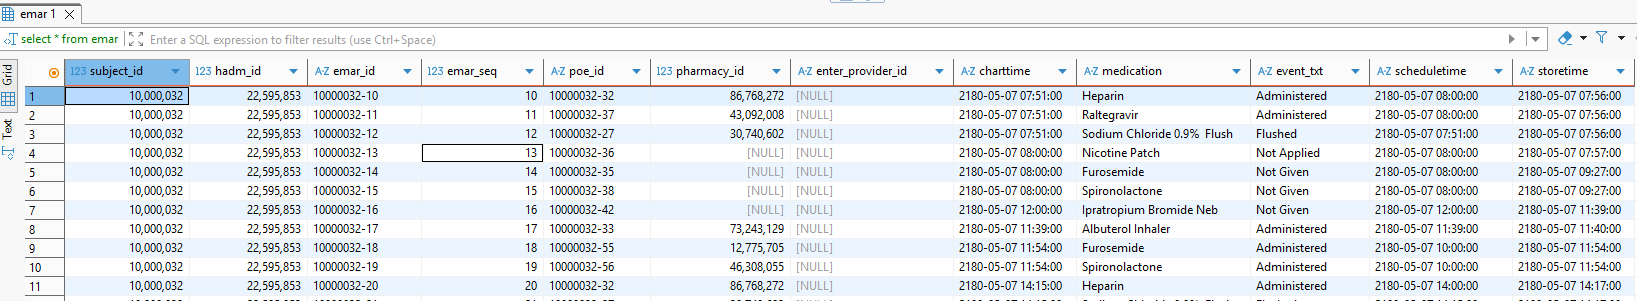

- **Bảng `emar_detail`**- Đây là **bảng chi tiết bổ sung** cho mỗi lần cấp phát thuốc (administration) được ghi trong bảng **emar** -> Nếu bảng **emar** chỉ cho bạn biết thuốc gì, lúc nào, ai cho, trạng thái ra sao → thì **emar_detail** đi sâu hơn vào chi tiết của từng liều.

| Trường                           | Loại dữ liệu | Ý nghĩa                                   | Mô tả                                                                                   |
| -------------------------------- | ------------ | ----------------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)                  | INTEGER NOT NULL          | Mã bệnh nhân                              | Định danh duy nhất cho bệnh nhân.  |
| emar_id (PK)                     | VARCHAR(25) NOT NULL       | Là **mã duy nhất cho từng lần cho thuốc trong eMAR**                           | Được tạo bằng cách nối **subject_id + "-" + emar_seq** |
| emar_seq                         | INTEGER NOT NULL          | Số nguyên tăng dần                    | Thể hiện thứ tự lệnh cấp thuốc theo thời gian                |
| **[parent_field_ordinal](https://colab.research.google.com/drive/16DhEShnsrfKIBgpIEpCjNfJuOu3W9rse#scrollTo=b7o6ND8UqD_W)**              | VARCHAR(10)       | Dùng để phân biệt nhiều lần cấp phát thuốc khác nhau cho cùng một sự kiện cấp thuốc trong eMAR                       | Giúp **đảm bảo tính chính xác và tracking** được trong **việc cấp phát thuốc**   |
| administration_type               | VARCHAR(50)       | Đây là **kiểu đường dùng/kiểu cấp thuốc** trong eMAR                        | **IV Bolus**: tiêm tĩnh mạch nhanh (một lần)
|||| **IV Infusion**: truyền tĩnh mạch liên tục
|||| **Medication Infusion**: truyền thuốc dạng dịch
|||| **Transdermal Patch**: miếng dán qua da\
|||| Ngoài ra, 2 giá trị ngoại lệ: **Standard Maintenance Medication** - mô tả đây là dòng tổng, **NULL** - không có thông tin.                 |
| pharmacy_id                       | INTEGER       | Là mã liên kết từ eMAR sang bảng pharmacy                              | Định danh duy nhất cho nhà thuốc hoặc đơn thuốc liên quan đến sự kiện eMAR.             |
| barcode_type                      | VARCHAR(4)       | Loại mã vạch                              | Loại mã vạch được sử dụng để quét thuốc (ví dụ: *"UPC"*, *"QR Code"*).                  |
| reason_for_no_barcode             | TEXT       | Lý do không quét mã vạch                  | Lý do tại sao không sử dụng mã vạch để xác nhận thuốc (nếu có).                         |
| complete_dose_not_given           | VARCHAR(5)       | Liều hoàn chỉnh không được sử dụng        | Chỉ báo nếu liều hoàn chỉnh không được sử dụng (ví dụ: *"Yes"*, *"No"*).                |
| dose_due                         | VARCHAR(100)       | Liều dự kiến                              | Liều lượng thuốc dự kiến cần sử dụng.                                                   |
| dose_due_unit                    | VARCHAR(50)       | Đơn vị liều dự kiến                       | Đơn vị đo của liều dự kiến (ví dụ: *"mg"*, *"mL"*).                                     |
| dose_given                       | VARCHAR(255)       | Liều đã sử dụng                           | Liều lượng thuốc thực tế đã được sử dụng.                                               |
| dose_given_unit                  | VARCHAR(50)       | Đơn vị liều đã sử dụng                    | Đơn vị đo của liều đã sử dụng (ví dụ: *"mg"*, *"mL"*).                                  |
| will_remainder_of_dose_be_given   | VARCHAR(5)       | Phần liều còn lại sẽ được sử dụng         | Chỉ báo nếu phần liều còn lại sẽ được sử dụng (ví dụ: *"Yes"*, *"No"*).                 |
| product_amount_given              | VARCHAR(30)       | Số lượng sản phẩm đã sử dụng              | Số lượng sản phẩm thuốc thực tế đã được sử dụng.                                        |
| product_unit                     | VARCHAR(30)       | Đơn vị sản phẩm                           | Đơn vị đo của sản phẩm thuốc (ví dụ: *"tablet"*, *"mL"*).                               |
| product_code                     | VARCHAR(30)       | Mã sản phẩm                               | Mã định danh duy nhất cho sản phẩm thuốc.                                               |
| product_description              | VARCHAR(255)       | Mô tả sản phẩm                            | Mô tả chi tiết về sản phẩm thuốc (ví dụ: *"Paracetamol 500mg Tablet"*).                 |
| product_description_other        | VARCHAR(255)       | Mô tả sản phẩm bổ sung                    | Mô tả bổ sung về sản phẩm thuốc nếu không thuộc danh mục chuẩn.                         |
| prior_infusion_rate              | VARCHAR(40)        | Tốc độ truyền trước đó                    | Tốc độ truyền dịch trước đó (nếu có, ví dụ: 100 mL/giờ).                                |
| infusion_rate                    | VARCHAR(40)        | Tốc độ truyền                             | Tốc độ truyền dịch hiện tại (ví dụ: 50 mL/giờ).                                         |
| infusion_rate_adjustment         | VARCHAR(50)       | Điều chỉnh tốc độ truyền                  | Loại điều chỉnh tốc độ truyền (ví dụ: *"Increase"*, *"Decrease"*).                      |
| infusion_rate_adjustment_amount  | VARCHAR(30)        | Số lượng điều chỉnh tốc độ truyền         | Số lượng thay đổi trong tốc độ truyền (ví dụ: 10 mL/giờ).                               |
| infusion_rate_unit               | VARCHAR(30)       | Đơn vị tốc độ truyền                      | Đơn vị đo của tốc độ truyền (ví dụ: *"mL/hr"*).                                         |
| [route](https://colab.research.google.com/drive/1Cdnymgk2xDZ9K4NVTLT3EwUjoqvtLu5p#scrollTo=UocqI_lN0xeL)                            | VARCHAR(10)       | Đường dùng thuốc                          | Đường dùng thuốc (ví dụ: *"IV"*, *"Oral"*, *"Subcutaneous"*).                           |
| infusion_complete                | VARCHAR(1)       | Hoàn tất truyền                           | Chỉ báo nếu quá trình truyền dịch đã hoàn tất (ví dụ: *"Yes"*, *"No"*).                 |
| completion_interval              | VARCHAR(50)       | Khoảng thời gian hoàn tất                 | Khoảng thời gian để hoàn tất quá trình truyền hoặc sử dụng thuốc.                       |
| new_iv_bag_hung                  | VARCHAR(1)       | Túi IV mới được treo                      | Chỉ báo nếu túi IV mới được treo (ví dụ: *"Yes"*, *"No"*).                              |
| continued_infusion_in_other_location | VARCHAR(1)    | Tiếp tục truyền ở vị trí khác             | Chỉ báo nếu quá trình truyền được tiếp tục ở vị trí khác (ví dụ: *"Yes"*, *"No"*).      |
| restart_interval                 | TEXT       | Khoảng thời gian khởi động lại            | Khoảng thời gian để khởi động lại quá trình truyền hoặc sử dụng thuốc.                  |
| side                             | VARCHAR(10)       | Bên cơ thể                                | Bên cơ thể nơi thuốc được sử dụng (ví dụ: *"Left"*, *"Right"*).                         |
| site                             | VARCHAR(255)       | Vị trí cơ thể                             | Vị trí cụ thể trên cơ thể nơi thuốc được sử dụng (ví dụ: *"Arm"*, *"Abdomen"*).         |
| non_formulary_visual_verification | VARCHAR(1)      | Xác minh trực quan thuốc ngoài danh mục   | Chỉ báo nếu thuốc không thuộc danh mục chuẩn được xác minh trực quan (ví dụ: *"Yes"*, *"No"*). |

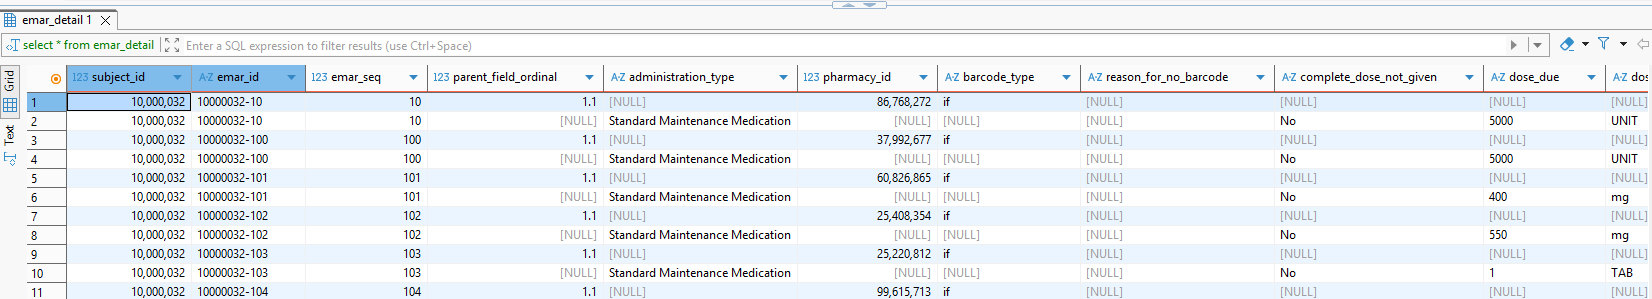

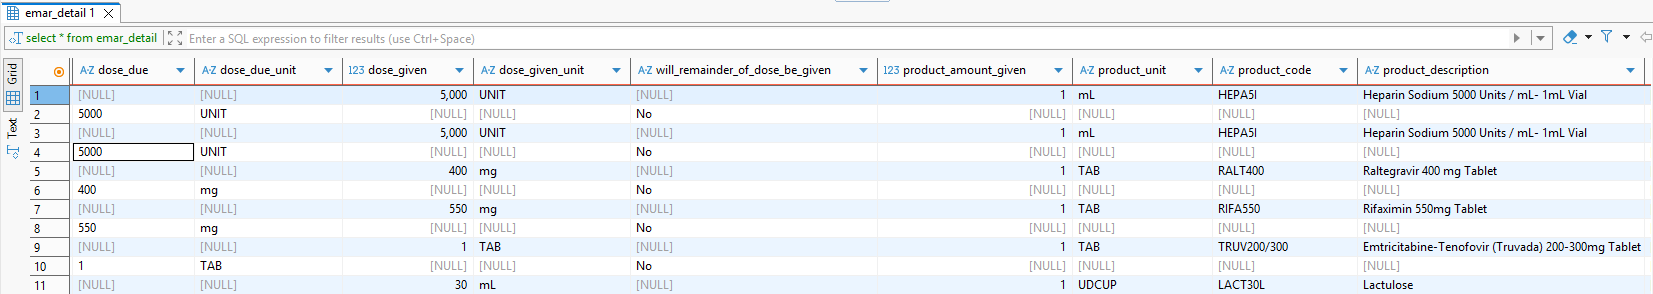

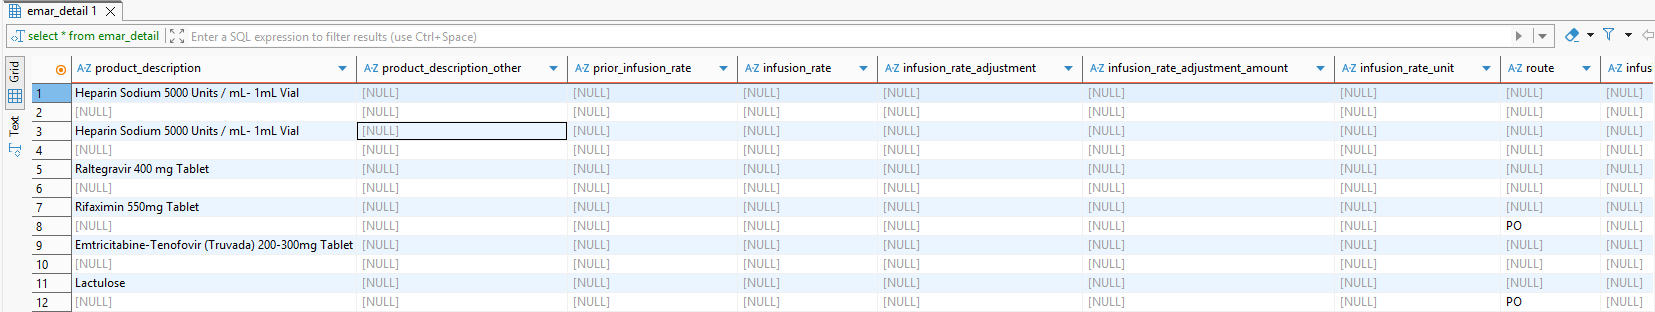

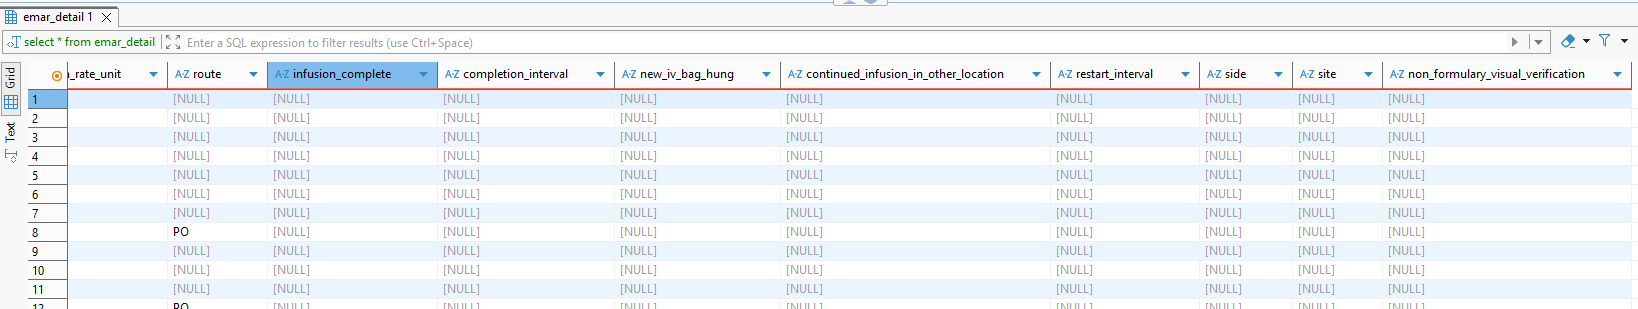

##### **2.1.2. Module icu (Hồi sức tích cực)**

###### **2.1.2.1. Theo dõi bệnh nhân (Patient tracking)**

- **Bảng `icustays`** - Bảng này ghi lại **thông tin các lần bệnh nhân nằm trong ICU (hồi sức tích cực)**.

**! Lưu ý**: Có nhiều loại phòng ICU khác nhau: MICU (Medical ICU), SICU (Surgical ICU), CCU (Coronary Care Unit), TSICU (Trauma/Surgical ICU)… nhưng đều có thể gọi chung là ICU. Bệnh nhân có thể chuyển qua lại giữa các phòng ICU, tùy tình hình thực tế.

| Trường         | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| -------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| stay_id (PK)   | INTEGER NOT NULL          | Mã định danh cho một lần nằm ICU (ICU stay)                | Một bệnh nhân có thể có nhiều lần nằm ICU trong một lần nhập viện.              |
| subject_id     | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến kỳ lưu viện ICU.                         |
| hadm_id        | INTEGER NOT NULL          | Mã lần nhập viện                 | Định danh duy nhất cho lần nhập viện liên quan đến kỳ lưu viện ICU.                    |
| first_careunit | VARCHAR(20)       | Loại ICU đầu tiên mà bệnh nhân vào trong stay đó          | Tên đơn vị chăm sóc đặc biệt đầu tiên mà bệnh nhân được chuyển vào (ví dụ: *"Medical ICU"*). |
| last_careunit  | VARCHAR(20)       | Loại ICU cuối cùng bệnh nhân ở trong stay đó         | Tên đơn vị chăm sóc đặc biệt cuối cùng mà bệnh nhân ở lại trước khi rời ICU.            |
| intime         | TIMESTAMP(0)    | Thời điểm bệnh nhân được chuyển vào ICU                 | Thời điểm bệnh nhân được chuyển vào đơn vị ICU.                                         |
| outtime        | TIMESTAMP(0)    | Thời điểm bệnh nhân được chuyển ra khỏi ICU.                  | Thời điểm bệnh nhân rời khỏi đơn vị ICU.                                                |
| los            | DOUBLE PRECISION        | Thời gian lưu viện ICU            | Thời gian bệnh nhân nằm ICU (được tính bằng số ngày, có thể là số thập phân, ví dụ 2.75 ngày)                             |

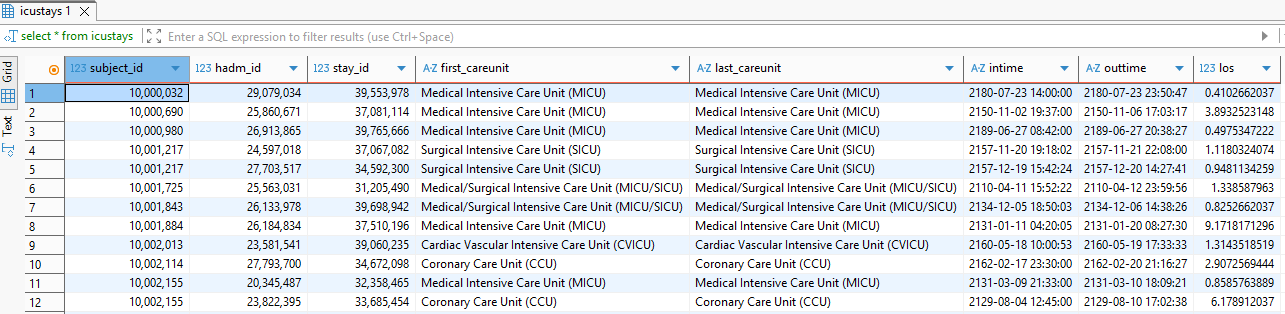

###### **2.1.2.2. Đo lường (Measurements)**

- **Bảng `caregiver`** - Đây là bảng ID của các **nhân viên y tế trong ICU** (bác sĩ, điều dưỡng, kỹ thuật viên, …). Bảng này chỉ đơn giản là **danh sách tất cả caregiver_id duy nhất** có trong dữ liệu ICU (không chứa thêm thông tin chi tiết như tên, chức danh).

- **Phân biệt caregiver và provider**

    - Trong dữ liệu **ICU (icu module)** → dùng thuật ngữ **caregiver** và **caregiver_id**.

    - Trong dữ liệu **bệnh viện chung (hosp module)** → dùng thuật ngữ **provider** và **provider_id**.

    - Về bản chất: cả **caregiver** và **provider** đều là **nhân viên y tế thực hành trong bệnh viện**.

    - Việc dùng hai tên khác nhau chỉ để phân biệt giữa hai hệ thống dữ liệu (ICU vs. bệnh viện tổng thể).

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| caregiver_id (PK) | INTEGER NOT NULL          | Mã ID của các nhân viên y tế trong ICU (bác sĩ, điều dưỡng, kỹ thuật viên, …)             | Định danh duy nhất cho mỗi nhân viên chăm sóc y tế (bác sĩ, y tá, dược sĩ, v.v.).       |

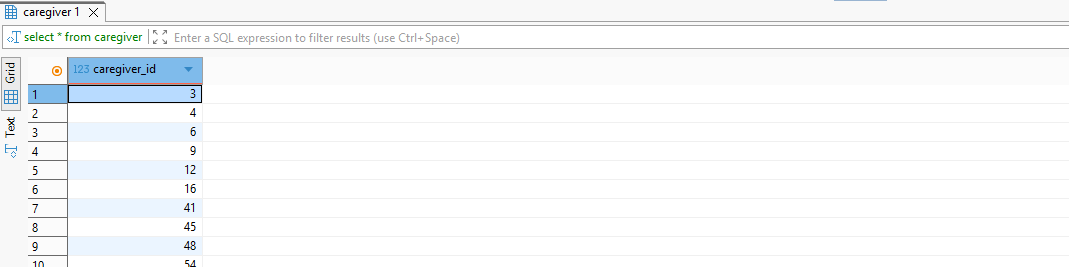

- **Bảng `d_items`** - Dùng để định nghĩa **itemid** – tức là mã định danh cho một loại **đo lường/khái niệm** cụ thể trong cơ sở dữ liệu ICU.
  - Ví dụ: **itemid là 220045** là mã định danh duy nhất cho **Heart Rate (nhịp tim)**.
  - Như vậy, bất cứ khi nào trong **các bảng events** bạn gặp **itemid = 220045**, bạn sẽ biết đó là **dữ liệu nhịp tim**.

| Trường              | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ------------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| itemid (PK)         | INTEGER NOT NULL          | Đại diện cho một loại đo lường/khái niệm                       | Ví dụ: nhịp tim, nhiệt độ, thuốc truyền…        |
| label               | VARCHAR(200)       | Mô tả tên đầy đủ của **itemid**                      | Ví dụ: Heart Rate                       |
| abbreviation        | VARCHAR(100)       | viết tắt phổ biến cho label, chỉ có trong hệ thống Metavision                      | Ví dụ: HR cho Heart Rate                                     |
| linksto             | VARCHAR(50)       | Cho biết **bảng sự kiện (event table)** mà **itemid được ghi nhận**                 | **Một itemid chỉ thuộc về một bảng sự kiện duy nhất** (Ví dụ: **không thể** vừa ở **chartevents**, vừa ở **ioevents**) |
| category            | VARCHAR(100)       | Phân loại thêm về loại dữ liệu mà itemid mô tả                          | Ví dụ:
||||**Arterial Blood Pressure systolic (Huyết áp động mạch tâm thu)** được phân vào loại **Routine Vital Signs (dấu hiệu sinh tồn)**
|||| **Arterial Blood Pressure Alarm - Low (cảnh báo từ monitor rằng huyết áp động mạch của bệnh nhân bị tụt thấp)** được phân vào loại **Alarms (Cảnh báo)**          |
| unitname            | VARCHAR(100)       | Đơn vị đo lường mặc định cho **itemid** (nếu có)                         | Ví dụ: bpm cho nhịp tim, °C cho nhiệt độ, mmHg cho huyết áp. **unitname** có thể NULL - không có đơn vị.                                    |
| param_type          | VARCHAR(30)       | Kiểu dữ liệu của giá trị được gh                     | Date and time (ngày/giờ), Numeric (số), Text (chuỗi ký tự).             |
| lownormalvalue      | FLOAT        | Giá trị bình thường thấp          | Giá trị tham chiếu dưới cho phạm vi bình thường của hạng mục (nếu có).                  |
| highnormalvalue     | FLOAT        | Giá trị bình thường cao           | Giá trị tham chiếu trên cho phạm vi bình thường của hạng mục (nếu có).
|||| -> Mục đích của 2 trường này là dùng để so sánh xem kết quả của bệnh nhân có nằm trong khoảng bình thường hay không?                  |

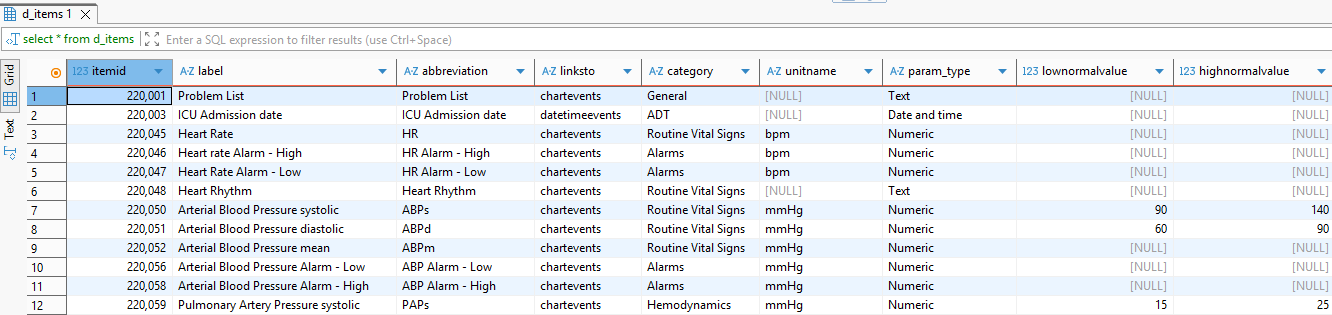

- **Bảng `chartevents` - Là bảng trung tâm lưu hầu hết thông tin lâm sàng của bệnh nhân ICU, bao gồm cả dữ liệu sao chép từ bảng khác (như labevents) để hiển thị trên hồ sơ điện tử**.
  - **Câu hỏi:** Tại sao phải **sao chép** dữ liệu từ **bảng events khác** vào bảng **chartevents**?

  - **Nguyên nhân:** để bác sĩ/điều dưỡng **tiện theo dõi ngay trong chart điện tử**, hệ thống sẽ copy giá trị từ các bảng **events** sang **chartevents**.

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)   | INTEGER NOT NULL          | Mã ID bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến sự kiện biểu đồ y tế.                   |
| hadm_id           | INTEGER NOT NULL          | Mã ID lần nhập viện                 | Định danh duy nhất cho lần nhập viện của bệnh nhân liên quan đến sự kiện biểu đồ.     |
| stay_id           | INTEGER NOT NULL          | Mã định danh cho một lần nằm ICU (ICU stay)                   | Một bệnh nhân có thể có nhiều lần nằm ICU trong một lần nhập viện       |
| caregiver_id      | INTEGER          | Mã ID của các nhân viên y tế trong ICU (bác sĩ, điều dưỡng, kỹ thuật viên, …)             | Mã **ID định danh** duy nhất cho **nhân viên y tế thực hiện hoặc ghi nhận** sự kiện (bác sĩ, y tá, v.v.). |
| charttime         | TIMESTAMP(0)    | Là thời điểm ghi nhận phép đo được thực hiện                | Ví dụ: máy monitor ghi lại huyết áp lúc 08:00 → charttime = 08:00.                                |
| storetime         | TIMESTAMP(0)    | Là thời điểm dữ liệu được nhập tay vào hệ thống hoặc được nhân viên y tế xác nhận                 | Thường **storetime** sẽ sau **charttime** 1 chút. Ví dụ: huyết áp đo lúc 08:00 (**charttime**) nhưng điều dưỡng nhập vào hồ sơ điện tử lúc 08:15 (**storetime**).                           |
| itemid            | INTEGER          | ID định danh cho một loại đo lường/khái niệm                      | Liên kết đến bảng **d_items**        |
| value             | VARCHAR(200)      | Là giá trị được ghi nhận cho khái niệm (concept) được xác định bởi **itemid**                   | Ví dụ: "120" (huyết áp tâm thu), "Alert" (tình trạng ý thức) |
| valuenum          | DOUBLE PRECISION        | Là phiên bản số của **value** nếu dữ liệu đó là dạng số            | **Nếu dữ liệu có thể quy đổi ra số**. Ví dụ: value = "120" → valuenum = 120
||||**Nếu dữ liệu không phải số** (ví dụ "Alert", "Full Code") → valuenum = NULL
|||| **Trường hợp đặc biệt**: Với các thang điểm (Glasgow Coma Scale, Code Status…) -> Có thể quy đổi thành số. Ví dụ: Spontaneously -> 4, Obeys Commands -> 6, Hospital -> 1,...              |
| valueuom          | VARCHAR(20)       | Đơn vị đo lường của **value**, nếu có                         | Ví dụ: mmHg (huyết áp), bpm (nhịp tim), °C (nhiệt độ).                       |
| warning           | SMALLINT       | Cho biết có cảnh báo (**warning**) nào được nhân viên y tế ghi nhận thủ công cho quan sát đó không?                          | Ví dụ: nếu **huyết áp rất thấp**, điều dưỡng có thể đánh dấu **warning = 1** để lưu ý. |

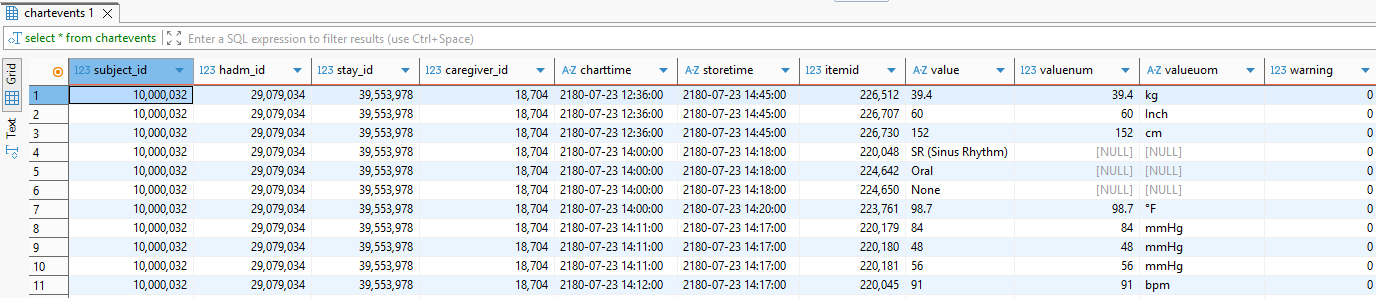

- **Bảng `datetimeevents`** - Là bảng **lưu các mốc thời gian quan trọng** (như ngày chạy thận, ngày rút ống thở…), không phải số đo sinh hiệu. Dù ngày tháng đã bị thay đổi để ẩn danh, **khoảng cách giữa các sự kiện vẫn chính xác**.

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)   | INTEGER NOT NULL          | Mã ID bệnh nhân                      | ID định danh duy nhất cho bệnh nhân liên quan đến sự kiện thời gian.                      |
| hadm_id           | INTEGER NOT NULL          | Mã ID lần nhập viện	                 | Định danh duy nhất cho lần nhập viện của bệnh nhân liên quan đến sự kiện biểu đồ.    |
| stay_id           | INTEGER NOT NULL          | Mã định danh cho một lần nằm ICU (ICU stay)                   | Một bệnh nhân có thể có nhiều lần nằm ICU trong một lần nhập viện.       |
| caregiver_id      | INTEGER NOT NULL          | Mã ID của các nhân viên y tế trong ICU (bác sĩ, điều dưỡng, kỹ thuật viên, …)	             | Mã ID định danh duy nhất cho nhân viên y tế thực hiện hoặc ghi nhận sự kiện (bác sĩ, y tá, v.v.). |
| charttime         | TIMESTAMP(3)    |  Thời điểm ghi nhận lâm sàng                | Khi nhân viên y tế ghi nhận/quan sát sự kiện  |
| storetime         | TIMESTAMP(3)    | Thời điểm lưu trữ vào database                 | Khi dữ liệu được commit vào cơ sở dữ liệu cuối cùng. Ví dụ: 14:15 - hệ thống xử lý và lưu record.                           |
| itemid            | INTEGER NOT NULL          | Là mã định danh cho một loại đo lường hoặc khái niệm cụ thể                       | Tham chiếu đến bảng **d_items** |
| value             | TIMESTAMP(3)    | Thời điểm sự kiện thực tế xảy ra                 | Khi bệnh nhân thực sự trải qua sự kiện y tế. |
| valueuom          | VARCHAR(20)       | Đơn vị đo của **value**                         | Đơn vị đo/kiểu dữ liệu đều là **TIMESTAMP**   |
| warning           | SMALLINT       | Cảnh báo                          | Cho biết liệu nhân viên y tế có ghi chú thủ công một cảnh báo liên quan đến quan sát này hay không.|

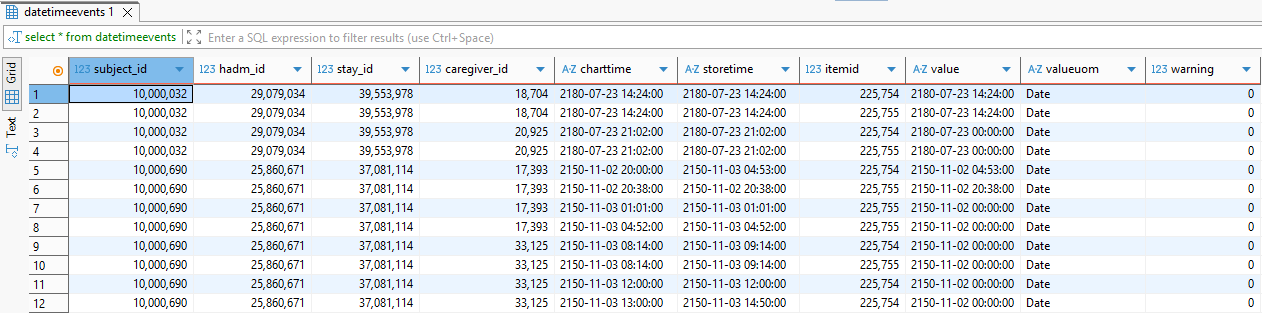

- **Bảng `inputevents`** - Bảng ghi lại các sự kiện đầu vào tổng quát trong ICU, như truyền dịch IV hoặc thuốc, với thông tin về lượng, tốc độ, và thời gian, nhưng **không phân tách chi tiết thành phần**.

| Trường                        | Loại dữ liệu | Ý nghĩa                                  | Mô tả                                                                                   |
| ----------------------------- | ------------ | ---------------------------------------  | --------------------------------------------------------------------------------------- |
| subject_id (PK)               | INTEGER NOT NULL          | Mã bệnh nhân                             | Định danh duy nhất cho bệnh nhân liên quan đến sự kiện đầu vào (input event).           |
| hadm_id                       | INTEGER NOT NULL          | Mã lượt nhập viện                        | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến sự kiện đầu vào.      |
| stay_id                       | INTEGER NOT NULL          | Mã kỳ lưu viện                          | Định danh duy nhất cho kỳ lưu viện của bệnh nhân (ví dụ: tại ICU hoặc khoa khác).       |
| caregiver_id                  | INTEGER NOT NULL          | Mã nhân viên chăm sóc                    | Định danh duy nhất cho nhân viên chăm sóc thực hiện hoặc ghi nhận sự kiện (bác sĩ, y tá, v.v.). |
| starttime                     | TIMESTAMP(0)    | Thời gian bắt đầu                        | Thời gian bắt đầu của sự kiện đầu vào (ví dụ: bắt đầu truyền dịch hoặc dùng thuốc).     |
| endtime                       | TIMESTAMP(0)    | Thời gian kết thúc                       | Thời gian kết thúc của sự kiện đầu vào (ví dụ: kết thúc truyền dịch).                  |
| storetime                     | TIMESTAMP(0)    | Thời gian lưu trữ                        | Thời gian cụ thể dữ liệu sự kiện được lưu trữ trong hệ thống.                           |
| itemid                        | INTEGER NOT NULL          | Là mã định danh cho một loại đo lường hoặc khái niệm cụ thể	                             | Định danh duy nhất cho thành phần hoặc hạng mục (ví dụ: loại thuốc, dung dịch truyền).               |
| amount                        | DOUBLE PRECISION        | Tổng lượng thuốc/dung dịch được truyền cho bệnh nhân                                 | **Tổng lượng** (số lượng, thể tích hoặc khối lượng) **thuốc hoặc dung dịch bệnh nhân nhận được** trong khoảng thời gian từ starttime → endtime                  |
| amountuom                     | VARCHAR(30)       | Đơn vị đo của amount	                         | Ví dụ: "mL", "mg", "kcal",…                                        |
| rate                          | DOUBLE PRECISION        | Tốc độ truyền (tốc độ đưa thuốc/dịch vào cơ thể)	                                   | Ví dụ: truyền NaCl 100 mL/giờ → rate = 100, rateuom = mL/hr                   |
| rateuom                       | VARCHAR(30)       | Đơn vị đo của **rate**                            | Ví dụ: mL/hr (mL mỗi giờ), mcg/kg/min (microgam mỗi kg cân nặng mỗi phút)…                                   |
| orderid                       | INTEGER NOT NULL       | Là mã định danh của một y lệnh truyền                                  | Là một mã duy nhất (unique identifier) được gán cho một lệnh cấp phát (order), liên kết các thành phần (items) thuộc cùng một dung dịch hoặc hỗn hợp được quản lý cùng lúc.                             |
| linkorderid                   | INTEGER NOT NULL       | Mã ID lệnh gốc (lệnh root)                         | Bao gồm các lệnh con (orderid) khác nhau. [Giải thích rõ hơn tại đây](https://colab.research.google.com/drive/13xbVDYvMUQFSFDwlen-gRxO-XvODAOvP#scrollTo=ep5UjI67S1n2).          |
| ordercategoryname             | VARCHAR(100)       | Thông tin trường này trả lời cho câu hỏi: “Y lệnh này thuộc nhóm chính nào?”                       | Ví dụ: Intravenous (truyền tĩnh mạch), Oral (uống), Nutrition (dinh dưỡng).                     |
| secondaryordercategoryname    | VARCHAR(100)       | Thông tin trường này trả lời cho câu hỏi: “Trong nhóm chính, nó thuộc loại phụ nào?”               | Ví dụ: Trong nhóm **Intravenous** có thể có: **Continuous infusion (truyền liên tục), Intermittent (truyền ngắt quãng), Bolus (truyền nhanh liều đơn)**             |
| ordercomponenttypedescription | VARCHAR(200)       |  Thông tin trường này trả lời cho câu hỏi: “Vai trò của thành phần này trong dung dịch là gì?”               | Ví dụ: **Main**: thuốc chính (Norepinephrine), **Additive**: chất phụ thêm vào (KCl), **Solution**: dung môi để pha (NaCl 0.9%).                        |
| ordercategorydescription      | VARCHAR(50)       | Thông tin trường này trả lời cho câu hỏi: “Mô tả chi tiết hơn của nhóm y lệnh này là gì?”                     | Ví dụ: Nếu **ordercategoryname = Intravenous** và **secondaryordercategoryname = Continuous infusion** → thì **ordercategorydescription** có thể ghi đầy đủ: **“Continuous IV infusion”**.       |
| patientweight                 | DOUBLE PRECISION        | Cân nặng bệnh nhân (kg) tại thời điểm truyền                       | Dùng để tính liều lượng thuốc/dung dịch truyền dựa trên cân nặng (Ví dụ: mg/kg)                           |
| totalamount                   | DOUBLE PRECISION        | Tổng lượng dịch chứa trong túi truyền (không phải liều thuốc cụ thể)                            | Ví dụ: túi NaCl 1000 mL có pha thêm 4 mg norepinephrine → totalamount = 1000 (trong y khoa, pha thêm 4mg quá nhỏ so với 1000ml dung dịch, nên vẫn tính tổng là 1000mL)   |
| totalamountuom                | VARCHAR(50)       | Đơn vị tổng số lượng                     | Đơn vị đo của tổng số lượng (ví dụ: *"mL"*, *"mg"*).                                   |
| isopenbag                     | SMALLINT       | Cho biết túi dịch có phải loại "Open bag" không?                                   | “Open bag” = một túi dịch đã mở và có thể dùng để pha trộn hoặc sử dụng nhiều lần.                          |
| continueinnextdept            | SMALLINT       | Khi bệnh nhân chuyển khoa (transfer), cột này cho biết liệu việc truyền dịch/thuốc có tiếp tục ở khoa mới hay không?                     | Ví dụ: bệnh nhân từ ICU chuyển ra phòng hậu phẫu nhưng vẫn giữ nguyên truyền norepinephrine → cột này = 1.        |
| statusdescription             | VARCHAR(30)       | Trường này cho biết trạng thái cuối cùng của một lần truyền thuốc/dịch (một dòng dữ liệu).                         | Nó giải thích tại sao việc truyền đó kết thúc. Có 6 giá trị:
|||| **Changed** – Kết thúc vì có thay đổi (thường là thay đổi tốc độ truyền).
|||| **Paused** – Việc truyền bị tạm dừng.
|||| **FinishedRunning** – Truyền kết thúc tự nhiên (thường do túi dịch hết).
|||| **Stopped** – Truyền bị nhân viên y tế dừng chủ động.
|||| **Rewritten** – Thông tin nhập sai → bị ghi đè bằng thông tin mới (các dòng này chỉ để kiểm toán, không tính vào thực tế bệnh nhân đã nhận).
|||| **Flushed** – Đường truyền được xả (thường bơm NaCl để làm sạch line).      |
| originalamount                | DOUBLE PRECISION        | Lượng thuốc hoặc chất trong túi dịch tại thời điểm starttime của một lần truyền mới                         | Ví dụ: túi NaCl 0.9% 100 mL pha 4 mg Noradrenaline → originalamount của NaCl = 100 mL, của Noradrenaline = 4 mg.            |
| originalrate                  | DOUBLE PRECISION        | Là tốc độ truyền ban đầu do bác sĩ/điều dưỡng nhập. Ví dụ: đặt tốc độ 10 mL/giờ                           | Tuy nhiên, **cột rate** lại phản ánh **tốc độ thực tế hệ thống ghi nhận được** (có thể khác do điều chỉnh, do máy bơm, hoặc do cập nhật y lệnh).             |

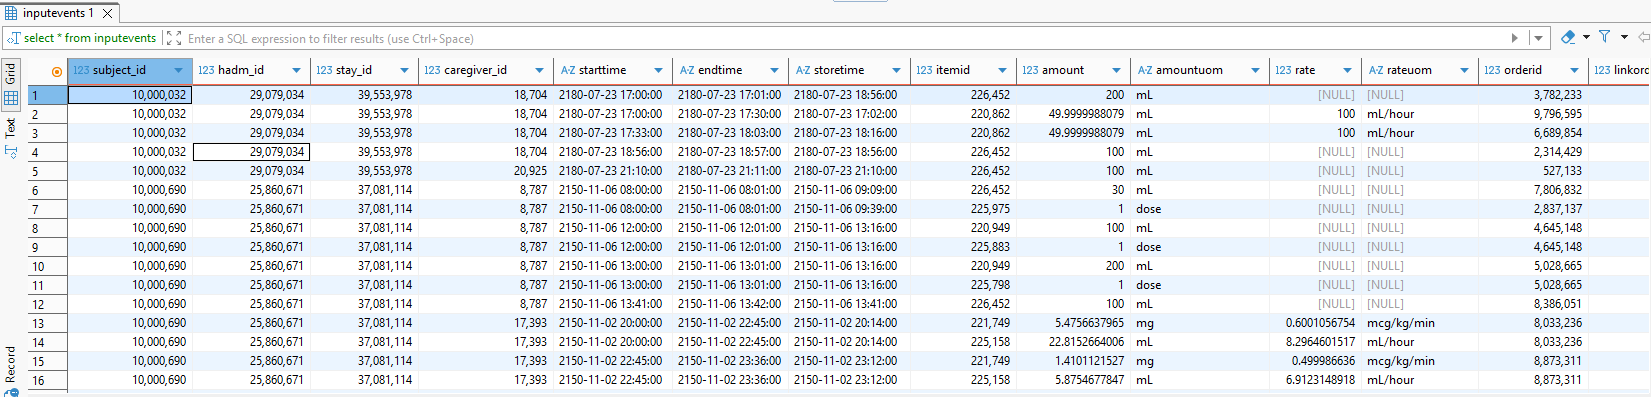

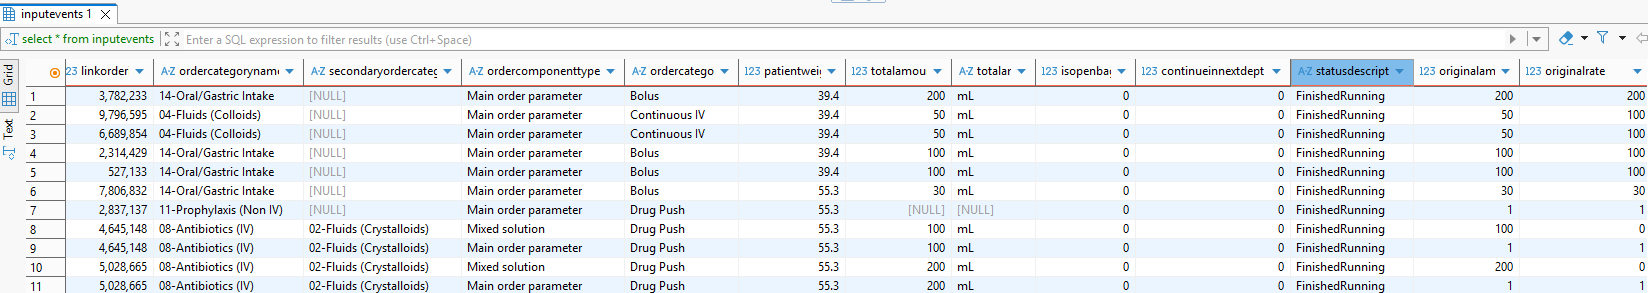

- **Bảng `ingredientevents`** - Là bảng bổ sung cho bảng **inputevents**. Nó cung cấp thông tin chi tiết về **các thành phần trong những túi dịch** được truyền cho bệnh nhân.


| Trường              | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ------------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)     | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến sự kiện thành phần (ingredient).         |
| hadm_id             | INTEGER NOT NULL          | Mã lượt nhập viện                 | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến sự kiện thành phần.   |
| stay_id             | INTEGER NOT NULL          | Mã kỳ lưu viện                   | Định danh duy nhất cho kỳ lưu viện của bệnh nhân (ví dụ: tại ICU hoặc khoa khác).       |
| caregiver_id        | INTEGER NOT NULL          | Mã nhân viên chăm sóc             | Định danh duy nhất cho nhân viên chăm sóc thực hiện hoặc ghi nhận sự kiện (bác sĩ, y tá, v.v.). |
| starttime           | TIMESTAMP(0)    | Thời gian bắt đầu                 | Thời gian bắt đầu của sự kiện liên quan đến thành phần (ví dụ: bắt đầu truyền dịch).    |
| endtime             | TIMESTAMP(0)    | Thời gian kết thúc                | Thời gian kết thúc của sự kiện liên quan đến thành phần (ví dụ: kết thúc truyền dịch).  |
| storetime           | TIMESTAMP(0)    | Thời gian lưu trữ                 | Thời gian cụ thể dữ liệu sự kiện được lưu trữ trong hệ thống.                           |
| itemid              | INTEGER NOT NULL          | Là mã định danh cho một loại đo lường hoặc khái niệm cụ thể                      | Định danh duy nhất cho thành phần hoặc hạng mục (ví dụ: loại thuốc, dung dịch truyền).  |
| amount              | DOUBLE PRECISION        | Tổng lượng thuốc/dung dịch được truyền cho bệnh nhân                          | **Tổng lượng** (số lượng, thể tích hoặc khối lượng) **thuốc hoặc dung dịch bệnh nhân nhận được** trong khoảng thời gian từ starttime → endtime                        |
| amountuom           | VARCHAR(20)       | Đơn vị đo của amount                   | Ví dụ: "mL", "mg", "kcal",…                                        |
| rate                | DOUBLE PRECISION        | Tốc độ truyền (tốc độ đưa thuốc/dịch vào cơ thể)        | Ví dụ: truyền NaCl 100 mL/giờ → rate = 100, rateuom = mL/hr                           |
| rateuom             | VARCHAR(20)       | Đơn vị đo của **rate**                     | Ví dụ: mL/hr (mL mỗi giờ), mcg/kg/min (microgam mỗi kg cân nặng mỗi phút)…                                   |
| orderid             | INTEGER NOT NULL       | Là mã định danh của một y lệnh truyền                           | Là một mã duy nhất (unique identifier) được gán cho một lệnh cấp phát (order), liên kết các thành phần (items) thuộc cùng một dung dịch hoặc hỗn hợp được quản lý cùng lúc.                           |
| linkorderid         | INTEGER NOT NULL       | Mã ID lệnh gốc (lệnh root)                  | Bao gồm các lệnh con (orderid) khác nhau. [Giải thích rõ hơn tại đây](https://colab.research.google.com/drive/13xbVDYvMUQFSFDwlen-gRxO-XvODAOvP#scrollTo=ep5UjI67S1n2)        |
| statusdescription   | VARCHAR(20)       | Trường này cho biết trạng thái cuối cùng của một lần truyền thuốc/dịch (một dòng dữ liệu).                  | Nó giải thích tại sao việc truyền đó kết thúc. Có 6 giá trị:
|||| **Changed** – Kết thúc vì có thay đổi (thường là thay đổi tốc độ truyền).
|||| **Paused** – Việc truyền bị tạm dừng.
|||| **FinishedRunning** – Truyền kết thúc tự nhiên (thường do túi dịch hết).
|||| **Stopped** – Truyền bị nhân viên y tế dừng chủ động.
|||| **Rewritten** – Thông tin nhập sai → bị ghi đè bằng thông tin mới (các dòng này chỉ để kiểm toán, không tính vào thực tế bệnh nhân đã nhận).
|||| **Flushed** – Đường truyền được xả (thường bơm NaCl để làm sạch line).     |
| originalamount      | DOUBLE PRECISION        | Thể hiện lượng ban đầu của thuốc/dịch trong túi tại thời điểm bắt đầu truyền                  | Ví dụ: túi NaCl 0.9% 100 mL pha 4 mg Noradrenaline → originalamount của NaCl = 100 mL, của Noradrenaline = 4 mg.                  |
| originalrate        | DOUBLE PRECISION        | Là tốc độ truyền ban đầu do bác sĩ/điều dưỡng nhập. Ví dụ: đặt tốc độ 10 mL/giờ                    | Tuy nhiên, **cột rate** lại phản ánh **tốc độ thực tế hệ thống ghi nhận được** (có thể khác do điều chỉnh, do máy bơm, hoặc do cập nhật y lệnh).                   |

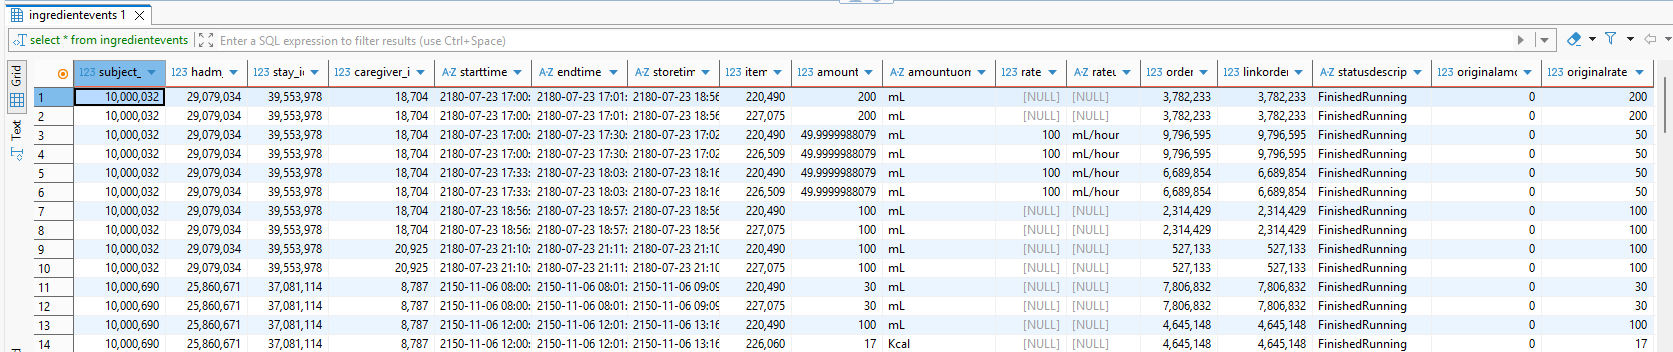

- **Bảng `outputevents`** - Đây là bảng ghi nhận dữ liệu đầu ra (outputs) của bệnh nhân trong ICU. Đầu ra ở đây có thể là:
  - **Foley catheter** - ống thông tiểu.
  - **TF Residual (Tube Feeding Residual)** - là một dạng ống nuôi ăn, nhưng bác sỹ cũng lấy dịch từ ống này.
  - **Condom Catheter** - ống thông tiểu bao cao su.


| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| subject_id (PK)   | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến sự kiện đầu ra (output event).           |
| hadm_id           | INTEGER NOT NULL          | Mã lượt nhập viện                 | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến sự kiện đầu ra.      |
| stay_id           | INTEGER NOT NULL          | Mã kỳ lưu viện                   | Định danh duy nhất cho kỳ lưu viện của bệnh nhân (ví dụ: tại ICU hoặc khoa khác).       |
| caregiver_id      | INTEGER NOT NULL          | Mã nhân viên chăm sóc             | Định danh duy nhất cho nhân viên chăm sóc thực hiện hoặc ghi nhận sự kiện (bác sĩ, y tá, v.v.). |
| charttime         | TIMESTAMP(3)    | Thời gian ghi nhận                | Thời gian cụ thể sự kiện đầu ra được ghi nhận trong hồ sơ y tế.                         |
| storetime         | TIMESTAMP(3)    | Thời gian lưu trữ                 | Thời gian cụ thể dữ liệu sự kiện được lưu trữ trong hệ thống.                           |
| itemid            | INTEGER NOT NULL          | Mã hạng mục                       | Định danh duy nhất cho hạng mục đầu ra (ví dụ: lượng nước tiểu, dịch dẫn lưu).         |
| value             | DOUBLE PRECISION        | Giá trị đầu ra                    | Giá trị của sự kiện đầu ra (ví dụ: 500 cho lượng nước tiểu).                            |
| valueuom          | VARCHAR(20)       | Đơn vị đo                         | Đơn vị đo của giá trị đầu ra (ví dụ: *"mL"*, *"cc"*).                                  |

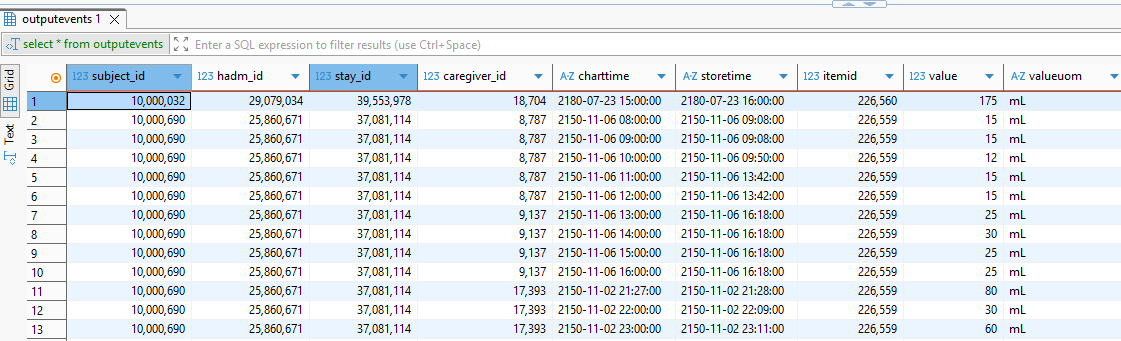

- **Bảng `procedureevents`** - Lưu trữ thông tin về **các thủ thuật y khoa** (**procedures**) được ghi nhận **trong thời gian bệnh nhân nằm ICU**. Ví dụ:
    + **Thở máy (ventilation)**.
    + **Đặt ống thông (intubation)**.
    + **Chụp X-quang, siêu âm** (có thể thực hiện ngoài khu vực ICU - nhưng vì đang trong quá trình điều trị ICU nên vẫn được ghi vào bảng này)

| Trường                   | Loại dữ liệu | Ý nghĩa                                  | Mô tả                                                                                   |
| ------------------------ | ------------ | ---------------------------------------  | --------------------------------------------------------------------------------------- |
| subject_id (PK)          | INTEGER NOT NULL          | Mã bệnh nhân                             | Định danh duy nhất cho bệnh nhân liên quan đến sự kiện thủ thuật.                      |
| hadm_id                  | INTEGER NOT NULL          | Mã lượt nhập viện                        | Định danh duy nhất cho lượt nhập viện của bệnh nhân liên quan đến sự kiện thủ thuật.   |
| stay_id                  | INTEGER NOT NULL          | Mã kỳ lưu viện                          | Định danh duy nhất cho kỳ lưu viện của bệnh nhân (ví dụ: tại ICU hoặc khoa khác).      |
| caregiver_id             | INTEGER          | Mã nhân viên chăm sóc                    | Định danh duy nhất cho nhân viên chăm sóc thực hiện hoặc ghi nhận thủ thuật (bác sĩ, y tá, v.v.). |
| starttime                | TIMESTAMP    | Thời gian bắt đầu                        | Thời gian bắt đầu thực hiện thủ thuật.                                                 |
| endtime                  | TIMESTAMP    | Thời gian kết thúc                       | Thời gian kết thúc thực hiện thủ thuật.                                                |
| storetime                | TIMESTAMP    | Thời gian lưu trữ                        | Thời gian cụ thể dữ liệu thủ thuật được lưu trữ trong hệ thống.                        |
| itemid                   | INTEGER NOT NULL          | Mã hạng mục                              | Định danh duy nhất cho loại thủ thuật (ví dụ: đặt ống thông, phẫu thuật).              |
| value                    | DOUBLE PRECISION        | Khoảng thời gian thực hiện thủ thuật                                  | Ví dụ: Với itemid = 225794 ("Non-invasive Ventilation"), value = 461 nghĩa là thông khí không xâm lấn kéo dài 461 phút.        |
| valueuom                 | VARCHAR(20)       | Đơn vị đo thời gian của trường value                                | Có thể là: "day", "hour", "min",...
|||| Nếu là "None" → tức là thủ thuật không có khái niệm thời lượng, mà chỉ mang tính chất tức thì - Ví dụ: chụp X-quang                                 |
| location                 | VARCHAR(100)       |  Vị trí cụ thể trên cơ thể bệnh nhân nơi thủ thuật diễn ra                         | Ví dụ: location = Left Upper Arm    |
| locationcategory         | VARCHAR(50)       | Danh mục vị trí                          | Danh mục của vị trí thực hiện thủ thuật (Ví dụ: "Invasive Venous" cho vị trí xâm lấn tĩnh mạch).         |
| orderid                  | INTEGER NOT NULL       | ID của y lệnh bác sĩ liên quan đến thủ thuật                                  | Định danh duy nhất cho lệnh liên quan đến thủ thuật.                                   |
| linkorderid              | INTEGER NOT NULL       | Dùng để gom nhóm các thủ thuật cùng một y lệnh gốc                         | Định danh lệnh liên quan hoặc lệnh gốc (nếu có) liên kết với thủ thuật.                 |
| ordercategoryname        | VARCHAR(50)       | Trả lời cho câu hỏi: Loại thủ thuật này thuộc nhóm nào?                        | Ví dụ: "Ventilation" cho thủ thuật thông khí.                        |
| ordercategorydescription | VARCHAR(30)       | Trả lời cho câu hỏi: Thủ thuật được thực hiện như thế nào?                      | Mô tả chi tiết hơn về cách thực hiện lệnh, như "Mechanical Ventilation" hoặc "Non-invasive Ventilation"    |
| patientweight            | DOUBLE PRECISION        | Cân nặng bệnh nhân                       | Cân nặng của bệnh nhân tại thời điểm thực hiện thủ thuật (ví dụ: 70 kg).               |
| isopenbag                | SMALLINT       | Túi mở                                   | Chỉ báo nếu túi truyền hoặc thiết bị được mở (ví dụ: *"Yes"*, *"No"*).                 |
| continueinnextdept       | SMALLINT       | Tiếp tục ở khoa khác                     | Chỉ báo nếu thủ thuật được tiếp tục ở khoa khác (ví dụ: *"Yes"*, *"No"*).              |
| statusdescription        | VARCHAR(20)       | Mô tả trạng thái                         | Trạng thái cuối cùng của thủ thuật/y lệnh. Các giá trị phổ biến:
|||| **Paused**: tạm dừng.
|||| **FinishedRunning**: kết thúc bình thường (thường vì hết túi dịch/thuốc).
|||| **Stopped**: ngừng lại do nhân viên y tế.    |
| originalamount           | DOUBLE PRECISION        | Trường có trong bảng nhưng không có ý nghĩa rõ ràng                         | **-> Không dùng cho phân tích, báo cáo**.      |
| originalrate             | DOUBLE PRECISION        | Trường có trong bảng nhưng không có ý nghĩa rõ ràng.                           | **-> Không dùng cho phân tích, báo cáo**.              |

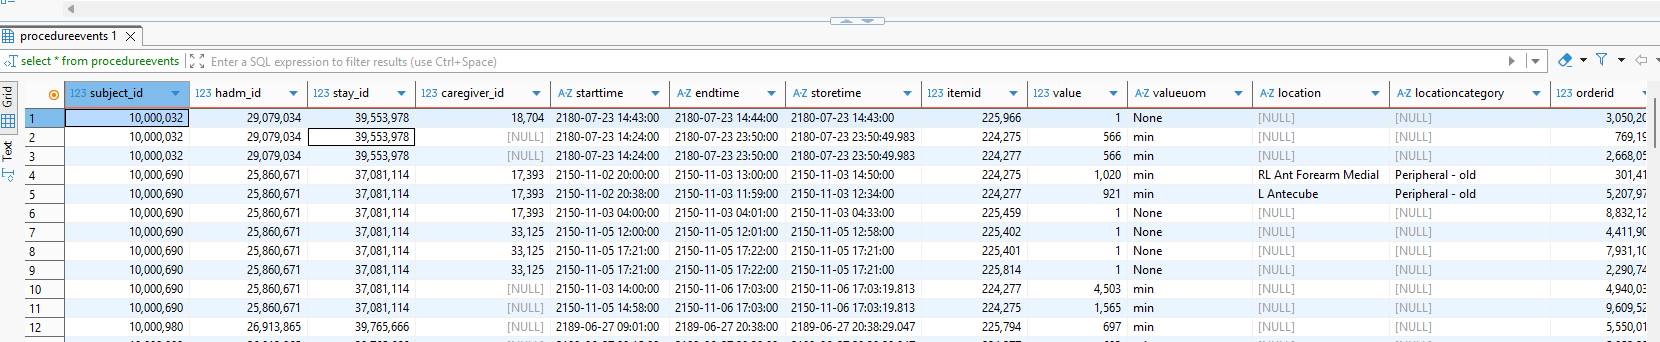

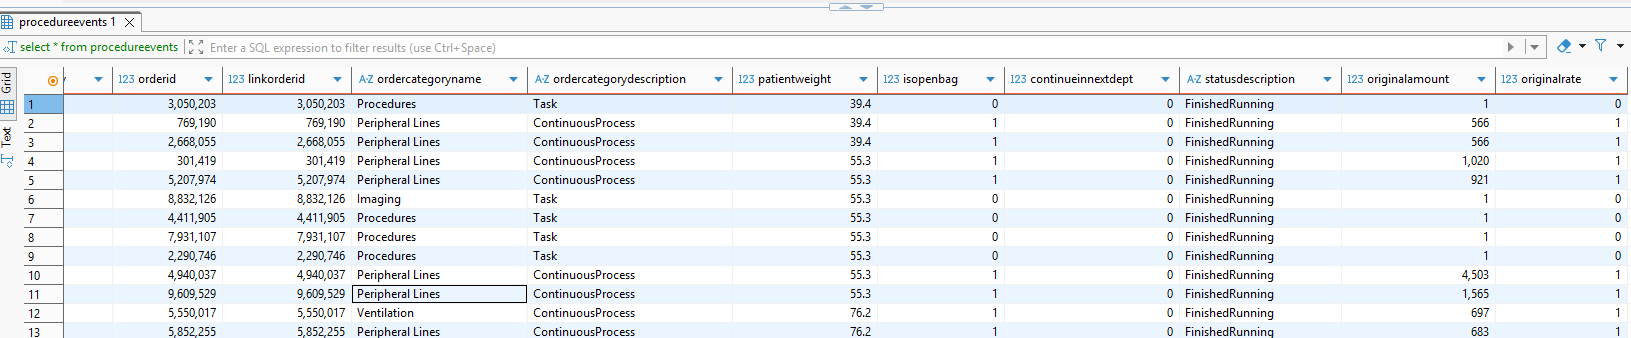

##### **2.1.3. Module note (Ghi chú lâm sàng)** - về sau mở rộng project thì hoàn thiện tiếp mục này.

###### **2.1.3.1. Các bảng dữ liệu ghi chú**

- Bảng `discharge`:

| Trường      | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                          |
| ----------- | ------------ | ------------------------ | ------------------------------------------------------------------------------ |
| note_id (PK)| VARCHAR(25) NOT NULL          | Mã ghi chú               | Định danh duy nhất cho mỗi ghi chú xuất viện hoặc ghi chú y tế.                |
| subject_id  | INTEGER NOT NULL          | Mã bệnh nhân             | Định danh duy nhất cho bệnh nhân liên quan đến ghi chú.                        |
| hadm_id     | INTEGER NOT NULL          | Mã lượt nhập viện        | Định danh duy nhất cho lượt nhập viện liên quan đến ghi chú.                   |
| note_type   | CHAR(2) NOT NULL       | Loại ghi chú             | Loại của ghi chú (ví dụ: *"Discharge Summary"*, *"Discharge Note"*).           |
| note_seq    | INTEGER NOT NULL          | Số thứ tự ghi chú        | Thứ tự của ghi chú trong chuỗi các ghi chú liên quan đến lượt nhập viện.       |
| charttime   | TIMESTAMP NOT NULL    | Thời gian ghi nhận       | Thời gian cụ thể ghi chú được ghi nhận trong hồ sơ y tế.                       |
| storetime   | TIMESTAMP    | Thời gian lưu trữ        | Thời gian cụ thể ghi chú được lưu trữ trong hệ thống.                          |
| text        | TEXT NOT NULL       | Nội dung ghi chú         | Nội dung chi tiết của ghi chú (ví dụ: tóm tắt chẩn đoán, điều trị, hướng dẫn xuất viện). |

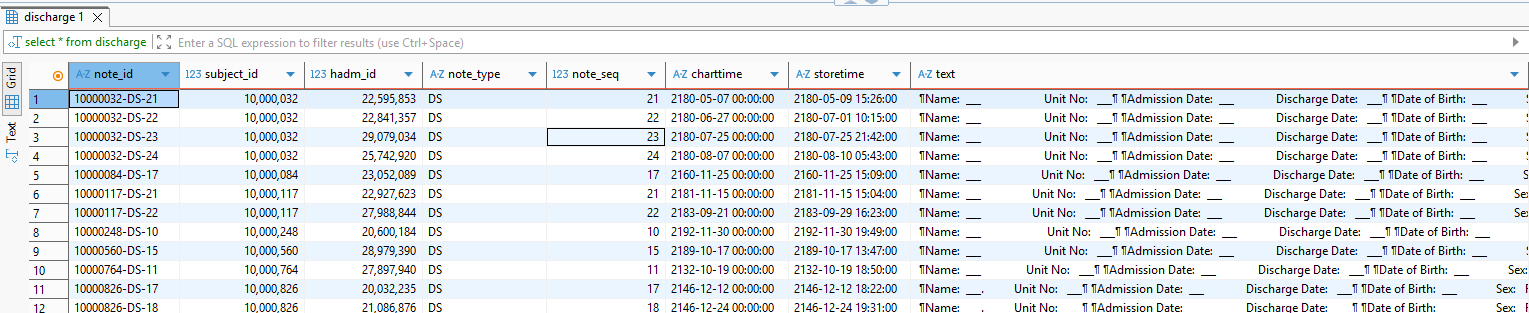

- Bảng `discharge_detail`:

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| note_id (PK)      | VARCHAR(25) NOT NULL          | Mã ghi chú                        | Định danh duy nhất cho ghi chú xuất viện liên quan đến chi tiết.                        |
| subject_id        | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến chi tiết ghi chú.                        |
| field_name        | VARCHAR(255) NOT NULL       | Tên trường                        | Tên của trường hoặc thuộc tính trong ghi chú (ví dụ: *"Author"*, *"Service"*).          |
| field_value       | TEXT NOT NULL       | Giá trị trường                    | Giá trị của trường (ví dụ: tên tác giả, đơn vị dịch vụ).                                |
| field_ordinal     | INTEGER NOT NULL          | Số thứ tự trường                  | Thứ tự của trường trong cấu trúc ghi chú, giúp sắp xếp các trường theo thứ tự logic.    |

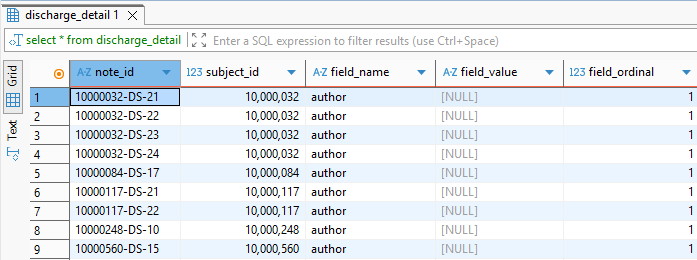

- Bảng `radiology`:

| Trường      | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                          |
| ----------- | ------------ | ------------------------ | ------------------------------------------------------------------------------ |
| note_id (PK)| VARCHAR(25) NOT NULL          | Mã ghi chú               | Định danh duy nhất cho mỗi ghi chú xạ hình hoặc báo cáo hình ảnh y tế.         |
| subject_id  | INTEGER NOT NULL          | Mã bệnh nhân             | Định danh duy nhất cho bệnh nhân liên quan đến ghi chú xạ hình.                |
| hadm_id     | INTEGER NOT NULL          | Mã lượt nhập viện        | Định danh duy nhất cho lượt nhập viện liên quan đến ghi chú xạ hình.           |
| note_type   | CHAR(2) NOT NULL       | Loại ghi chú             | Loại của ghi chú (ví dụ: *"Radiology Report"*, *"Imaging Note"*).              |
| note_seq    | INTEGER NOT NULL          | Số thứ tự ghi chú        | Thứ tự của ghi chú trong chuỗi các ghi chú liên quan đến lượt nhập viện.       |
| charttime   | TIMESTAMP NOT NULL    | Thời gian ghi nhận       | Thời gian cụ thể ghi chú được ghi nhận trong hồ sơ y tế.                       |
| storetime   | TIMESTAMP    | Thời gian lưu trữ        | Thời gian cụ thể ghi chú được lưu trữ trong hệ thống.                          |
| text        | TEXT NOT NULL       | Nội dung ghi chú         | Nội dung chi tiết của báo cáo xạ hình (ví dụ: mô tả hình ảnh, kết quả chẩn đoán). |

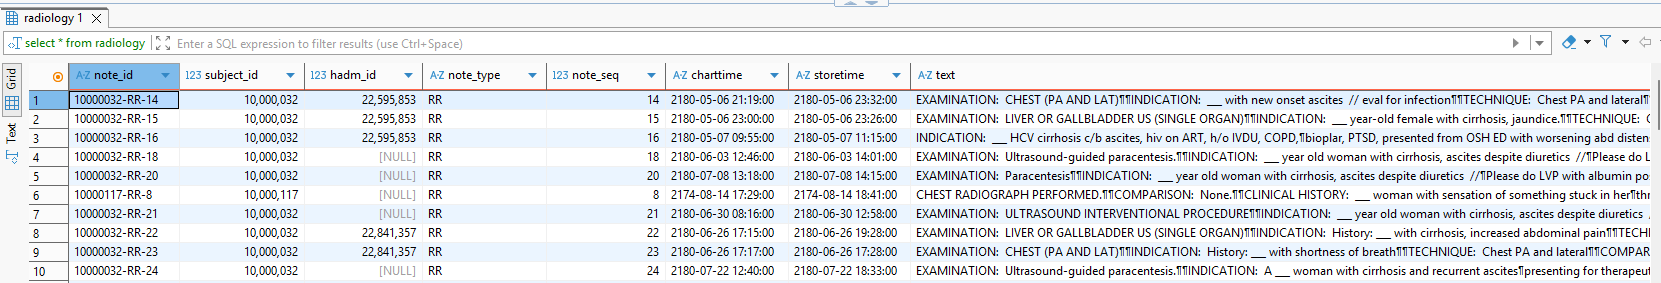

- Bảng `radiology_detail`:

| Trường            | Loại dữ liệu | Ý nghĩa                           | Mô tả                                                                                   |
| ----------------- | ------------ | --------------------------------- | --------------------------------------------------------------------------------------- |
| note_id (PK)      | VARCHAR(25) NOT NULL          | Mã ghi chú                        | Định danh duy nhất cho ghi chú xạ hình liên quan đến chi tiết.                          |
| subject_id        | INTEGER NOT NULL          | Mã bệnh nhân                      | Định danh duy nhất cho bệnh nhân liên quan đến chi tiết ghi chú xạ hình.                |
| field_name        | VARCHAR(255) NOT NULL       | Tên trường                        | Tên của trường hoặc thuộc tính trong ghi chú xạ hình (ví dụ: *"Author"*, *"Findings"*). |
| field_value       | TEXT NOT NULL       | Giá trị trường                    | Giá trị của trường (ví dụ: tên tác giả, mô tả phát hiện hình ảnh).                      |
| field_ordinal     | INTEGER NOT NULL          | Số thứ tự trường                  | Thứ tự của trường trong cấu trúc ghi chú xạ hình, giúp sắp xếp các trường theo thứ tự logic. |

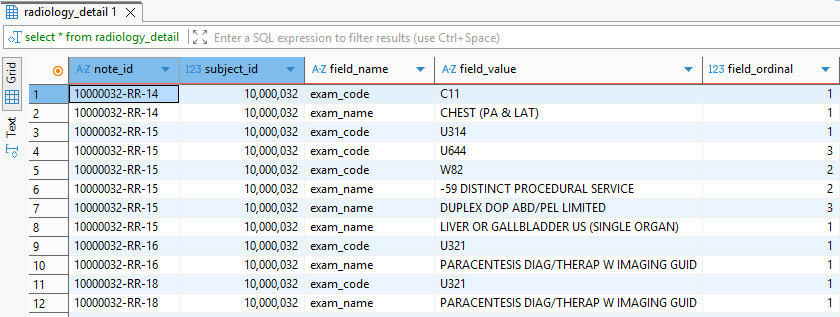